#**Customer Personality Analysis**

###**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


###**Attributes**

####**People**

**ID:** Customer's unique identifier\
**Year_Birth:** Customer's birth year\
**Education:** Customer's education level\
**Marital_Status:** Customer's marital status\
**Income:** Customer's yearly household income\
**Kidhome:** Number of children in customer's household\
**Teenhome:** Number of teenagers in customer's household\
**Dt_Customer:** Date of customer's enrollment with the company\
**Recency:** Number of days since customer's last purchase\
**Complain:** 1 if the customer complained in the last 2 years, 0 otherwise

####**Products**

**MntWines:** Amount spent on wine in last 2 years\
**MntFruits:** Amount spent on fruits in last 2 years\
**MntMeatProducts:** Amount spent on meat in last 2 years\
**MntFishProducts:** Amount spent on fish in last 2 years\
**MntSweetProducts:** Amount spent on sweets in last 2 years\
**MntGoldProds:** Amount spent on gold in last 2 years

####**Promotion**

**NumDealsPurchases:** Number of purchases made with a discount\
**AcceptedCmp1:** 1 if customer accepted the offer in the 1st campaign, 0 otherwise\
**AcceptedCmp2:** 1 if customer accepted the offer in the 2nd campaign, 0 otherwise\
**AcceptedCmp3:** 1 if customer accepted the offer in the 3rd campaign, 0 otherwise\
**AcceptedCmp4:** 1 if customer accepted the offer in the 4th campaign, 0 otherwise\
**AcceptedCmp5:** 1 if customer accepted the offer in the 5th campaign, 0 otherwise\
**Response:** 1 if customer accepted the offer in the last campaign, 0 otherwise

####**Place**

**NumWebPurchases:** Number of purchases made through the company’s website\
**NumCatalogPurchases:** Number of purchases made using a catalogue\
**NumStorePurchases:** Number of purchases made directly in stores\
**NumWebVisitsMonth:** Number of visits to company’s website in the last month

####**Target**

Need to perform clustering to summarize customer segments.

In [157]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [158]:
mc = pd.read_csv('../content/marketing_campaign.csv')
mc.head()

id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

###**Step 1 : Dataset Overview and Descriptive Statistics**




In [159]:
mc.shape

(2240, 29)

In [160]:
mc.size

64960

In [161]:
mc.columns

Index(['id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [162]:
mc.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [163]:
mc.describe()

id   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [164]:
mc.describe(exclude=[np.number])

Education Marital_Status Dt_Customer
count         2240           2240        2240
unique           5              8         663
top     Graduation        Married  31-08-2012
freq          1127            864          12

In [165]:
mc.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [166]:
mc.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

####**Observation 1:**
There are 29 columns and 2,240 observations.\
Column 'Dt_Customer' is a date column but has object data type.\
Columns 'Z_CostContact' and 'Z_Revenue' have same values throughout the whole dataset. Don't add much value for analysis. Hence will be dropped\
Column 'Education', categories are 'Graduation', 'PhD', 'Master', 'Basic' and '2n Cycle'.

*   '2n Cycle' means Master's/specialization degree. Hence will be updated as 'Master' category only

Column 'Marital_Status', categories are 'Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd' and 'YOLO'.

*   'Single' & 'Alone' are equivalent hence will be updated as 'Single'
*   'Married' & 'Together' are equivalent hence will be updated as 'Married'
*   'Absurd' & 'YOLO' doesn't tell about the marital status hence will be dropped.

'Approx_Age' column will be created based on 'Year_Birth' column to make more sense.\
Will create 'EnrolledDays' column will be created based on 'Dt_Customer' column to make more sense.\
Create Column 'Children' from columns 'KidHome' and "TeenHome'.\
Create column 'NumOfCampaigns' from columns 'AcceptedCmp3', 'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2' and 'Response'.\
Rename columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' for better understanding.



####**Checking for Missing Values, Inconsistent Values/Noise, Duplicate records.**

In [167]:
import missingno as msgn

In [168]:
mc.duplicated().sum()

0

In [169]:
mc[mc.duplicated()]

Empty DataFrame
Columns: [id, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

In [170]:
mc.dtypes

id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [171]:
mc.isna().sum()

id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [172]:
mc[mc.Income.isna()]

id  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
10    15-11-2013       11         5  ...                  7             0   
27    20-02-2013       19         5  ...                  1             0   
43    05-11-2013       80        81  ...                  2             0   
48    01-01-2014       96        48  ...                  6             0   
58    17-06-2013       57        11  ...                  6             0   
71    14-09-2012       25        25  ...                  8             0   
90    19-11-2012        4       230  ...                  9             0   
91    27-05-2014       45         7  ...                  7             0   
92    23-11-2013       87       445  ...                  1             0   
128   11-07-2013       23       352  ...                  6             0   
133   11-08-2013       96       231  ...                  4             0   
312   03-06-2013       69       861  ...                  3             0   
319   23-08-2013       67       738  ...                  7             0   
1379  01-04-2013       39       187  ...                  5             0   
1382  03-09-2012       87        19  ...                  5             0   
1383  12-01-2014       49         5  ...                  7             0   
1386  02-03-2014       17        25  ...                  7             0   
2059  18-05-2013       52       375  ...                  3             0   
2061  31-05-2013       82        23  ...                  6             0   
2078  03-03-2013       82        71  ...                  8             0   
2079  23-06-2013       83       161  ...                  6             0   
2081  18-10-2013       95       264  ...                  7             0   
2084  30-10-2013       75       532  ...                  1             0   
2228  12-08-2012       53        32  ...                  0             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedC

<Axes: >

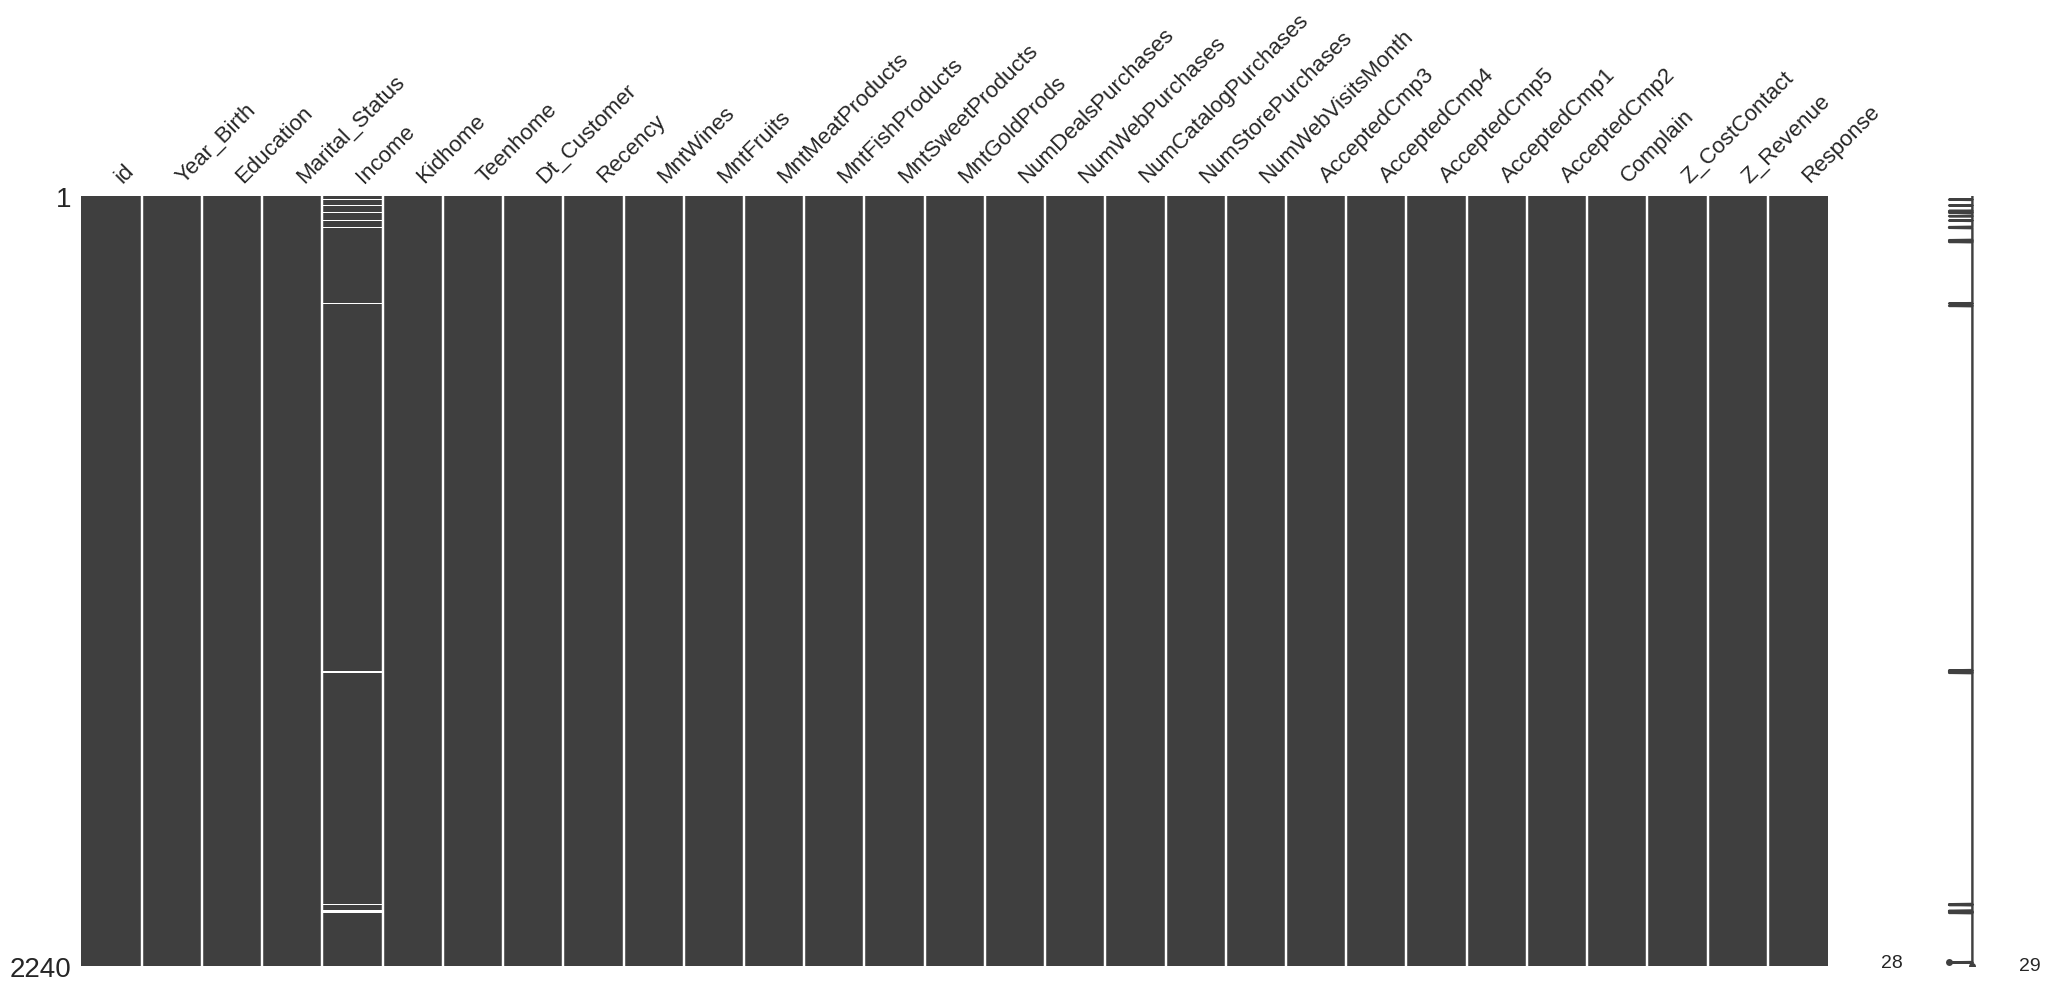

In [173]:
msgn.matrix(mc)

In [174]:
mc.isna().sum()/len(mc)*100

id                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

####**Observation 2:**

Column 'Income' have 24 missing values and it accounts for 1.07% percent of the total records. We will impute the missing values using Iterative Imputer.\
There are no duplicate records.\
There no inconsistent/noisy values

####**Data Pre-Processing, Cleaning and Wrangling begins.....**

In [175]:
#Column 'Dt_Customer' is a date column but has object data type. Changing to datetime64[ns]

mc['Dt_Customer'] = pd.to_datetime(mc.Dt_Customer,dayfirst=True)
mc['Dt_Customer']

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [176]:
#Columns 'Z_CostContact' and 'Z_Revenue' have same values throughout the whole dataset. Don't add much value for analysis. Hence will be dropped

mc.drop(columns=['Z_CostContact','Z_Revenue'], axis=1,inplace=True)

In [177]:
#Column 'Education', category '2n Cycle' means Master's/specialization degree. Hence will be updated as 'Master'

mc['Education'] = np.where(mc['Education'] =='2n Cycle','Master',mc['Education'])
mc['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

In [178]:
#Column 'Marital_Status',
#'Single' & 'Alone' are equivalent hence will be updated as 'Single'
#'Married' & 'Together' are equivalent hence will be updated as 'Married'

mc['Marital_Status'] = np.where(mc['Marital_Status']=='Alone','Single',np.where(mc['Marital_Status']=='Together','Married',mc['Marital_Status']))
mc['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced', 'Widow', 'Absurd', 'YOLO'],
      dtype=object)

In [179]:
#'Absurd' & 'YOLO' doesn't tell about the marital status hence will be dropped.
mask = (mc.loc[:,'Marital_Status']=='Absurd') | (mc.loc[:,'Marital_Status']=='YOLO')
mc = mc.drop(mc[mask].index,axis=0).reset_index(drop=True)
mc

id  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation        Married  71613.0        0   
3      6182        1984  Graduation        Married  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2231  10870        1967  Graduation        Married  61223.0        0   
2232   4001        1946         PhD        Married  64014.0        2   
2233   7270        1981  Graduation       Divorced  56981.0        0   
2234   8235        1956      Master        Married  69245.0        0   
2235   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
0            0  2012-09-04       58       635  ...                   10   
1            1  2014-03-08       38        11  ...                    1   
2            0  2013-08-21       26       426  ...                    2   
3            0  2014-02-10       26        11  ...                    0   
4            0  2014-01-19       94       173  ...                    3   
...        ...         ...      ...       ...  ...                  ...   
2231         1  2013-06-13       46       709  ...                    3   
2232         1  2014-06-10       56       406  ...                    2   
2233         0  2014-01-25       91       908  ...                    3   
2234         1  2014-01-24        8       428  ...                    5   
2235         1  2012-10-15       40        84  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2231                  4                  5             0             0   
2232                  5                  7             0             0   
2233                 13                  6             0             1   
2234                 10                  3             0             0   
2235                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                0             0             0         0         1  
1                0             0             0         0         0  
2                0             0             0         0         0  
3                0             0             0         0         0  
4                0             0             0         0         0  
...            ...           ...           ...       ...       ...  
2231             0             0             0         0         0  
2232             0             1             0         0         0  
2233             0             0             0         0         0  
2234             0             0             0         0         0  
2235             0             0             0         0         1  

[2236 rows x 27 columns]

In [180]:
#'Approx_Age(NoOfYears)' column will be created based on 'Year_Birth' column to make more sense.

#import datetime as dt
#current_year = dt.date.today().year

latest_year = mc['Dt_Customer'].max().year

mc['Approx_Age'] = latest_year - mc['Year_Birth']
mc.head(2)

id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumStorePurchases  NumWebVisitsMonth  \
0  2012-09-04       58       635  ...                  4                  7   
1  2014-03-08       38        11  ...                  2                  5   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   

   Complain  Response  Approx_Age  
0         0         1          57  
1         0         0          60  

[2 rows x 28 columns]

In [181]:
#'EnrolledDays' column will be created based on 'Dt_Customer' column to make more sense.

#current_date = pd.to_datetime(dt.date.today())

#mc['SinceEnrollment(Years)'] = (current_date.date() - mc['Dt_Customer'].apply(lambda x: x.date())).apply(lambda x: round(x.days/365))

mc['EnrolledDays'] = (mc['Dt_Customer'].max() - mc['Dt_Customer']).apply(lambda x: str(x).split(" ")[0]).apply(lambda x: int(x))

mc.head(2)

id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   

   Approx_Age  EnrolledDays  
0          57           663  
1          60           113  

[2 rows x 29 columns]

In [182]:
#Create Column 'Children' from columns 'KidHome' and "TeenHome'.

mc['Children'] = mc['Kidhome'] + mc['Teenhome']
mc.head(2)



id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp3  AcceptedCmp4  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Approx_Age  \
0             0             0             0         0         1          57   
1             0             0             0         0         0          60   

   EnrolledDays  Children  
0           663         0  
1           113         2  

[2 rows x 30 columns]

In [183]:
#Create column 'NumOfCampaigns' from columns 'AcceptedCmp3', 'AcceptedCmp4',	'AcceptedCmp5',	'AcceptedCmp1',	'AcceptedCmp2' and 'Response'.

mc['NumOfCampaigns'] = mc['AcceptedCmp1'] + mc['AcceptedCmp2'] + mc['AcceptedCmp3'] + mc['AcceptedCmp4'] + mc['AcceptedCmp5'] + mc['Response']

mc.head(2)


id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   

  Dt_Customer  Recency  MntWines  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04       58       635  ...             0             0   
1  2014-03-08       38        11  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Approx_Age  EnrolledDays  \
0             0             0         0         1          57           663   
1             0             0         0         0          60           113   

   Children  NumOfCampaigns  
0         0               1  
1         2               0  

[2 rows x 31 columns]

In [184]:
#Rename columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds' for better understanding.

mc.rename(columns={'MntWines':'Wines2yrAmtSpnt', 'MntFruits':'Fruits2yrAmtSpnt', 'MntMeatProducts':'Meat2yrAmtSpnt', 'MntFishProducts':'Fish2yrAmtSpnt', 'MntSweetProducts':'Sweet2yrAmtSpnt', 'MntGoldProds':'Gold2yrAmtSpnt'}, inplace=True)

mc.head(2)

id  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   

  Dt_Customer  Recency  Wines2yrAmtSpnt  ...  AcceptedCmp4  AcceptedCmp5  \
0  2012-09-04       58              635  ...             0             0   
1  2014-03-08       38               11  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Response  Approx_Age  EnrolledDays  \
0             0             0         0         1          57           663   
1             0             0         0         0          60           113   

   Children  NumOfCampaigns  
0         0               1  
1         2               0  

[2 rows x 31 columns]

In [185]:
mcclean = mc.drop(columns=['id','Year_Birth','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Kidhome','Teenhome','Dt_Customer']).copy()
mcclean.head(2)

Education Marital_Status   Income  Recency  Wines2yrAmtSpnt  \
0  Graduation         Single  58138.0       58              635   
1  Graduation         Single  46344.0       38               11   

   Fruits2yrAmtSpnt  Meat2yrAmtSpnt  Fish2yrAmtSpnt  Sweet2yrAmtSpnt  \
0                88             546             172               88   
1                 1               6               2                1   

   Gold2yrAmtSpnt  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0              88                  3                8                   10   
1               6                  2                1                    1   

   NumStorePurchases  NumWebVisitsMonth  Complain  Approx_Age  EnrolledDays  \
0                  4                  7         0          57           663   
1                  2                  5         0          60           113   

   Children  NumOfCampaigns  
0         0               1  
1         2               0

In [186]:
#Column 'Income' have 24 missing values and it accounts for 1.07% percent of the total records.
#We will impute the missing values using Iterative Imputer.


from sklearn.experimental import enable_iterative_imputer        #explicitly require this experimental feature
from sklearn.impute import IterativeImputer                      #import normally from sklearn.impute
from sklearn.ensemble import RandomForestRegressor

mcd = mcclean.drop(columns=['Education','Marital_Status'],axis=1)

imp = IterativeImputer(estimator = RandomForestRegressor(), n_nearest_features=5,skip_complete=True)
imp.fit(mcd)


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(estimator=RandomForestRegressor(), n_nearest_features=5,
                 skip_complete=True)

In [187]:
mcclean['Income'] = pd.Series(data=imp.transform(mcd)[:,0])
mcclean.head(2)

Education Marital_Status   Income  Recency  Wines2yrAmtSpnt  \
0  Graduation         Single  58138.0       58              635   
1  Graduation         Single  46344.0       38               11   

   Fruits2yrAmtSpnt  Meat2yrAmtSpnt  Fish2yrAmtSpnt  Sweet2yrAmtSpnt  \
0                88             546             172               88   
1                 1               6               2                1   

   Gold2yrAmtSpnt  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0              88                  3                8                   10   
1               6                  2                1                    1   

   NumStorePurchases  NumWebVisitsMonth  Complain  Approx_Age  EnrolledDays  \
0                  4                  7         0          57           663   
1                  2                  5         0          60           113   

   Children  NumOfCampaigns  
0         0               1  
1         2               0

In [188]:
mcclean.isna().sum()

Education              0
Marital_Status         0
Income                 0
Recency                0
Wines2yrAmtSpnt        0
Fruits2yrAmtSpnt       0
Meat2yrAmtSpnt         0
Fish2yrAmtSpnt         0
Sweet2yrAmtSpnt        0
Gold2yrAmtSpnt         0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Approx_Age             0
EnrolledDays           0
Children               0
NumOfCampaigns         0
dtype: int64

In [189]:
mcclean.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Wines2yrAmtSpnt',
       'Fruits2yrAmtSpnt', 'Meat2yrAmtSpnt', 'Fish2yrAmtSpnt',
       'Sweet2yrAmtSpnt', 'Gold2yrAmtSpnt', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Approx_Age', 'EnrolledDays',
       'Children', 'NumOfCampaigns'],
      dtype='object')

###**Step 2 : Feature Assesment and Analysis via Visualization**


*   Univariate Analysis
*   Bivariate Analysis
*   Multivariate Analysis




In [190]:
#mask = ((mc.dtypes=='int64')|(mc.dtypes=='float64'))
#num_feat = list(mc.dtypes[mask].index.drop(['id','Year_Birth','Recency','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']))
#mc.columns

num_cont_feat = ['Income','Wines2yrAmtSpnt','Fruits2yrAmtSpnt','Meat2yrAmtSpnt','Fish2yrAmtSpnt','Sweet2yrAmtSpnt','Gold2yrAmtSpnt','Approx_Age','EnrolledDays','Recency']
num_disc_feat = ['Children','NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cat_feat = ['Education', 'Marital_Status','Complain']

####**Univariate Analysis**

Numerical Features(Continuous) - Histogram with kde curve\
Numerical Features(Discreet) - Count Plot\
Categorical Features -  Count Plot

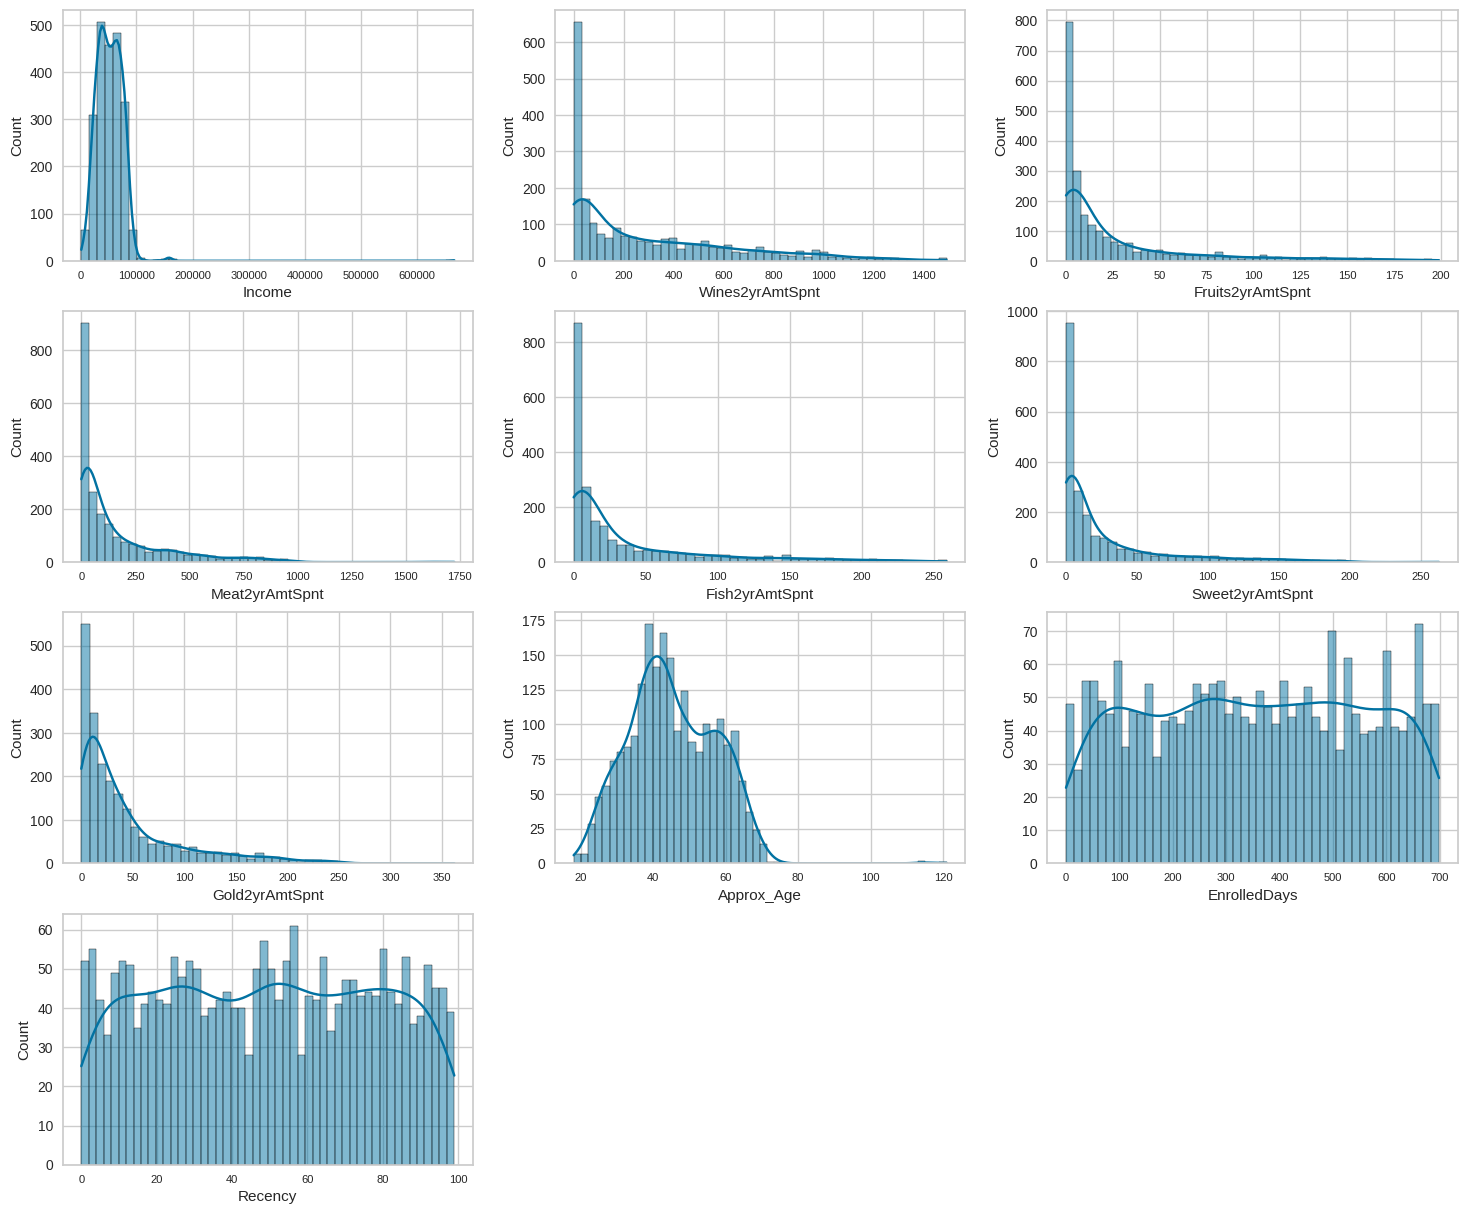

In [191]:
plt.figure(figsize=(18,15))

for i,col in enumerate(num_cont_feat,start=1):
  plt.subplot(4,3,i)
  fence = mcclean[col].max() - mcclean[col].min()
  bins = round(np.sqrt(mcclean[col].count()))
  bin_width = round(fence/bins)
  sns.histplot(data = mcclean, x=mcclean[col], kde=True, binwidth=bin_width)
  plt.xticks(fontsize=8)


####**Skewness and Kurtosis**

Skewness is the measure of symmetry of the distribution\
   3 Types:\
Skewness between -0.5 to 0.5, distribution is symmetrical/normal\
Skewness between -1 to -0.5 or 0.5 to 1, distribution is moderately skewed\
Skewness less than -1 or greater than 1, distribution is highly skewed


Kurtosis is the measure of heaviness of the distribution. It is the sharpness of the peak of a frequency-distribution curve .It is actually the measure of outliers present in the distribution.

 If the distribution is tall and thin it is called a leptokurtic distribution(Kurtosis > 3). Values in a leptokurtic distribution are near the mean or at the extremes.

 A flat distribution where the values are moderately spread out (i.e., unlike leptokurtic) is called platykurtic(Kurtosis <3) distribution.

 A distribution whose shape is in between a leptokurtic distribution and a platykurtic distribution is called a mesokurtic(Kurtosis=3) distribution. A mesokurtic distribution looks more close to a normal distribution.



In [192]:
for i in num_cont_feat:
  print(i)
  print(f'Skewness: {mcclean[i].skew()}')
  print(f'Kurtosis: {mcclean[i].kurt()}')

Income
Skewness: 6.719493237606613
Kurtosis: 158.22226708507725
Wines2yrAmtSpnt
Skewness: 1.1754520270521251
Kurtosis: 0.5940863238501719
Fruits2yrAmtSpnt
Skewness: 2.1067153170811537
Kurtosis: 4.07235194007451
Meat2yrAmtSpnt
Skewness: 2.0842435167987707
Kurtosis: 5.521214178848696
Fish2yrAmtSpnt
Skewness: 1.9240637927671516
Kurtosis: 3.128983011386127
Sweet2yrAmtSpnt
Skewness: 2.1354442572785213
Kurtosis: 4.370942293898866
Gold2yrAmtSpnt
Skewness: 1.886944210988867
Kurtosis: 3.5668243662900214
Approx_Age
Skewness: 0.35184430036072895
Kurtosis: 0.7194565884101873
EnrolledDays
Skewness: -0.013747776449970696
Kurtosis: -1.1928301778687764
Recency
Skewness: -0.0023038433399146943
Kurtosis: -1.2025528866244972


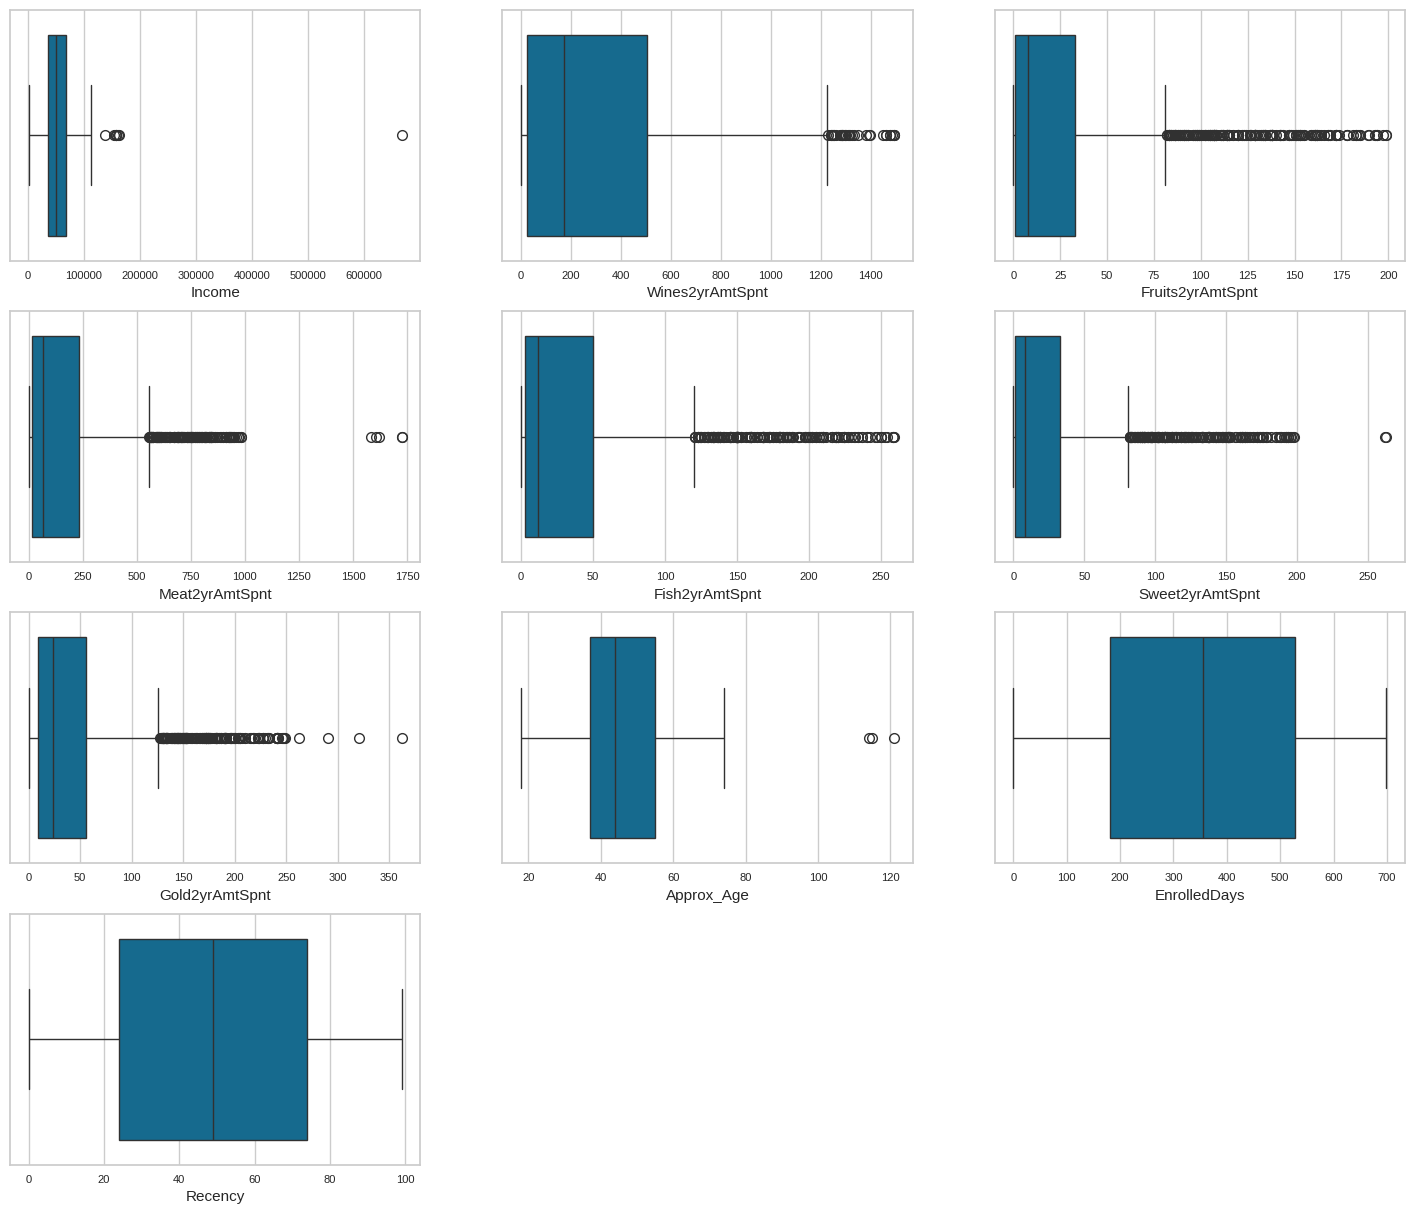

In [193]:
plt.figure(figsize=(18,15))

for i,col in enumerate(num_cont_feat,start=1):
  plt.subplot(4,3,i)
  sns.boxplot(data = mcclean, x=mcclean[col])
  plt.xticks(fontsize=8)

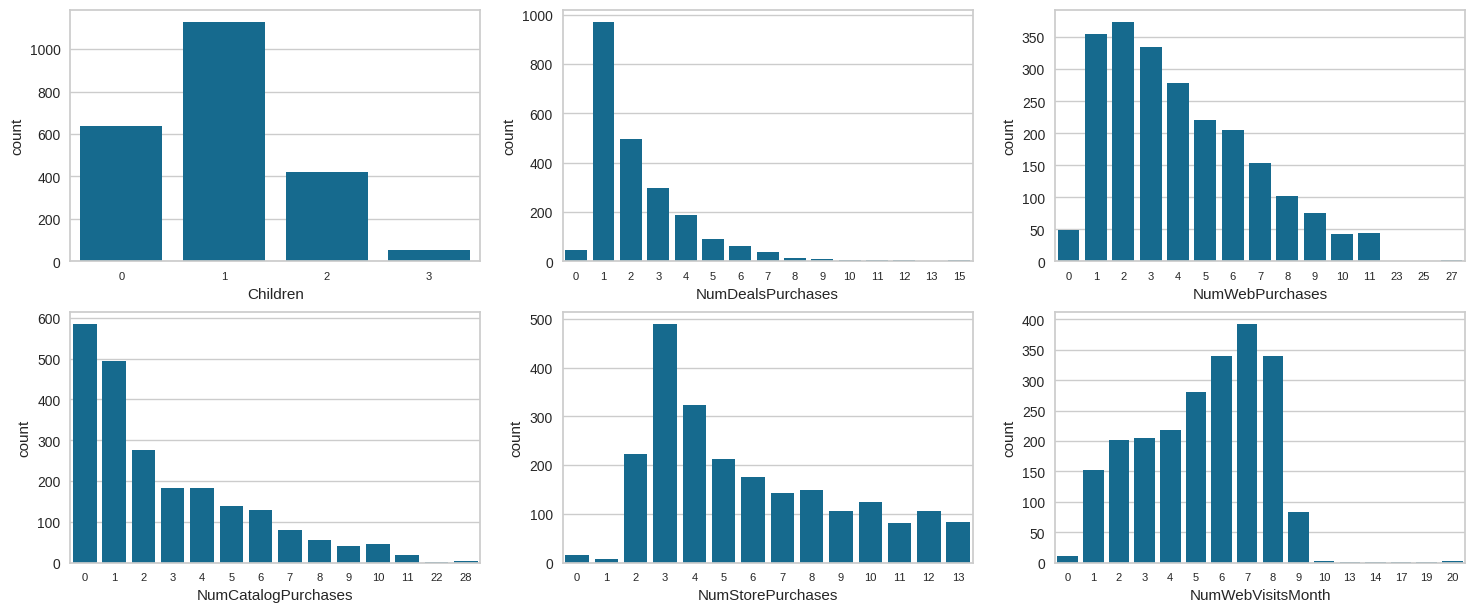

In [194]:
plt.figure(figsize=(18,15))

for i,col in enumerate(num_disc_feat,start=1):
  plt.subplot(4,3,i)
  sns.countplot(data = mcclean, x=mcclean[col])
  plt.xticks(fontsize=8)

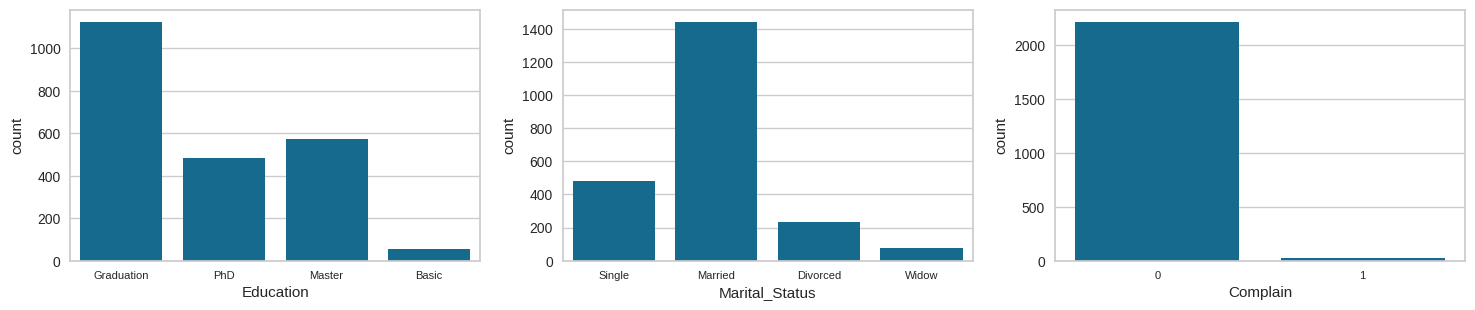

In [195]:
plt.figure(figsize=(18,15))

for i,col in enumerate(cat_feat,start=1):
  plt.subplot(4,3,i)
  sns.countplot(data = mc, x=mc[col])
  plt.xticks(fontsize=8)

In [196]:
for col in num_cont_feat:
  q1,q2,q3 = np.percentile(mcclean[col],[25,50,75])
  iqr = q3-q1
  lower_bound = q1-1.5*iqr
  upper_bound = q3+1.5*iqr
  extr_lower_bound = q1-3*iqr
  extr_upper_bound = q3+3*iqr
  print(col)
  print(f'Lower Bound: {lower_bound}   and   Upper Bound: {upper_bound}')
  print(f'Extreme Lower Bound: {extr_lower_bound}   and   Extreme Upper Bound: {extr_upper_bound}')
  print(mcclean.loc[(mcclean[col] < extr_lower_bound)|(mcclean[col] > extr_upper_bound),col].values)

Income
Lower Bound: -14444.25   and   Upper Bound: 118301.75
Extreme Lower Bound: -64224.0   and   Extreme Upper Bound: 168081.5
[666666.]
Wines2yrAmtSpnt
Lower Bound: -700.0   and   Upper Bound: 1228.0
Extreme Lower Bound: -1423.0   and   Extreme Upper Bound: 1951.0
[]
Fruits2yrAmtSpnt
Lower Bound: -47.0   and   Upper Bound: 81.0
Extreme Lower Bound: -95.0   and   Extreme Upper Bound: 129.0
[164 172 194 133 162 189 138 153 134 148 162 183 147 138 153 144 163 134
 152 137 190 162 138 134 155 151 153 183 181 159 134 166 142 133 178 168
 148 174 199 138 152 137 138 168 172 178 130 161 138 142 161 185 147 162
 161 172 168 151 199 172 161 197 137 194 184 160 185 133 140 131 147 132
 138 169 169 142 172 134 153 183 138 193 137 193 149 151 143 154 161 159
 178 132 144 155 142 194]
Meat2yrAmtSpnt
Lower Bound: -308.0   and   Upper Bound: 556.0
Extreme Lower Bound: -632.0   and   Extreme Upper Bound: 880.0
[1725  925  951  921 1582  974  925  940 1622  898  929  890  925  961
  915  913  946  9

###**Observation 3:**

Column 'Income' is having a major outleir value '666666'.\
Column 'Approx_Age' is having 3 major outleir values 114,115 & 121. These are pretty impossible values as far as a person's age is concerned.

Columns 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts' & 'MntGoldProds' are having a lot of major outleir values. Due to this the distribution is highly right skewed.\
As these values are amount of purchases over the period of 2 years they aren't necessarily incorrect values and may have significance on Cutomer personality.
Hence will log transform them in order to get a normal distribution form

####**Bivariate Analysis**

Numerical vs Numerical Features - Scatter Plot\
Categorical vs Categorical Features - Count Plot\
Numerical vs Categorical Features - Bar Plot


In [197]:
num_feat = num_cont_feat+num_disc_feat
num_feat

['Income',
 'Wines2yrAmtSpnt',
 'Fruits2yrAmtSpnt',
 'Meat2yrAmtSpnt',
 'Fish2yrAmtSpnt',
 'Sweet2yrAmtSpnt',
 'Gold2yrAmtSpnt',
 'Approx_Age',
 'EnrolledDays',
 'Recency',
 'Children',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

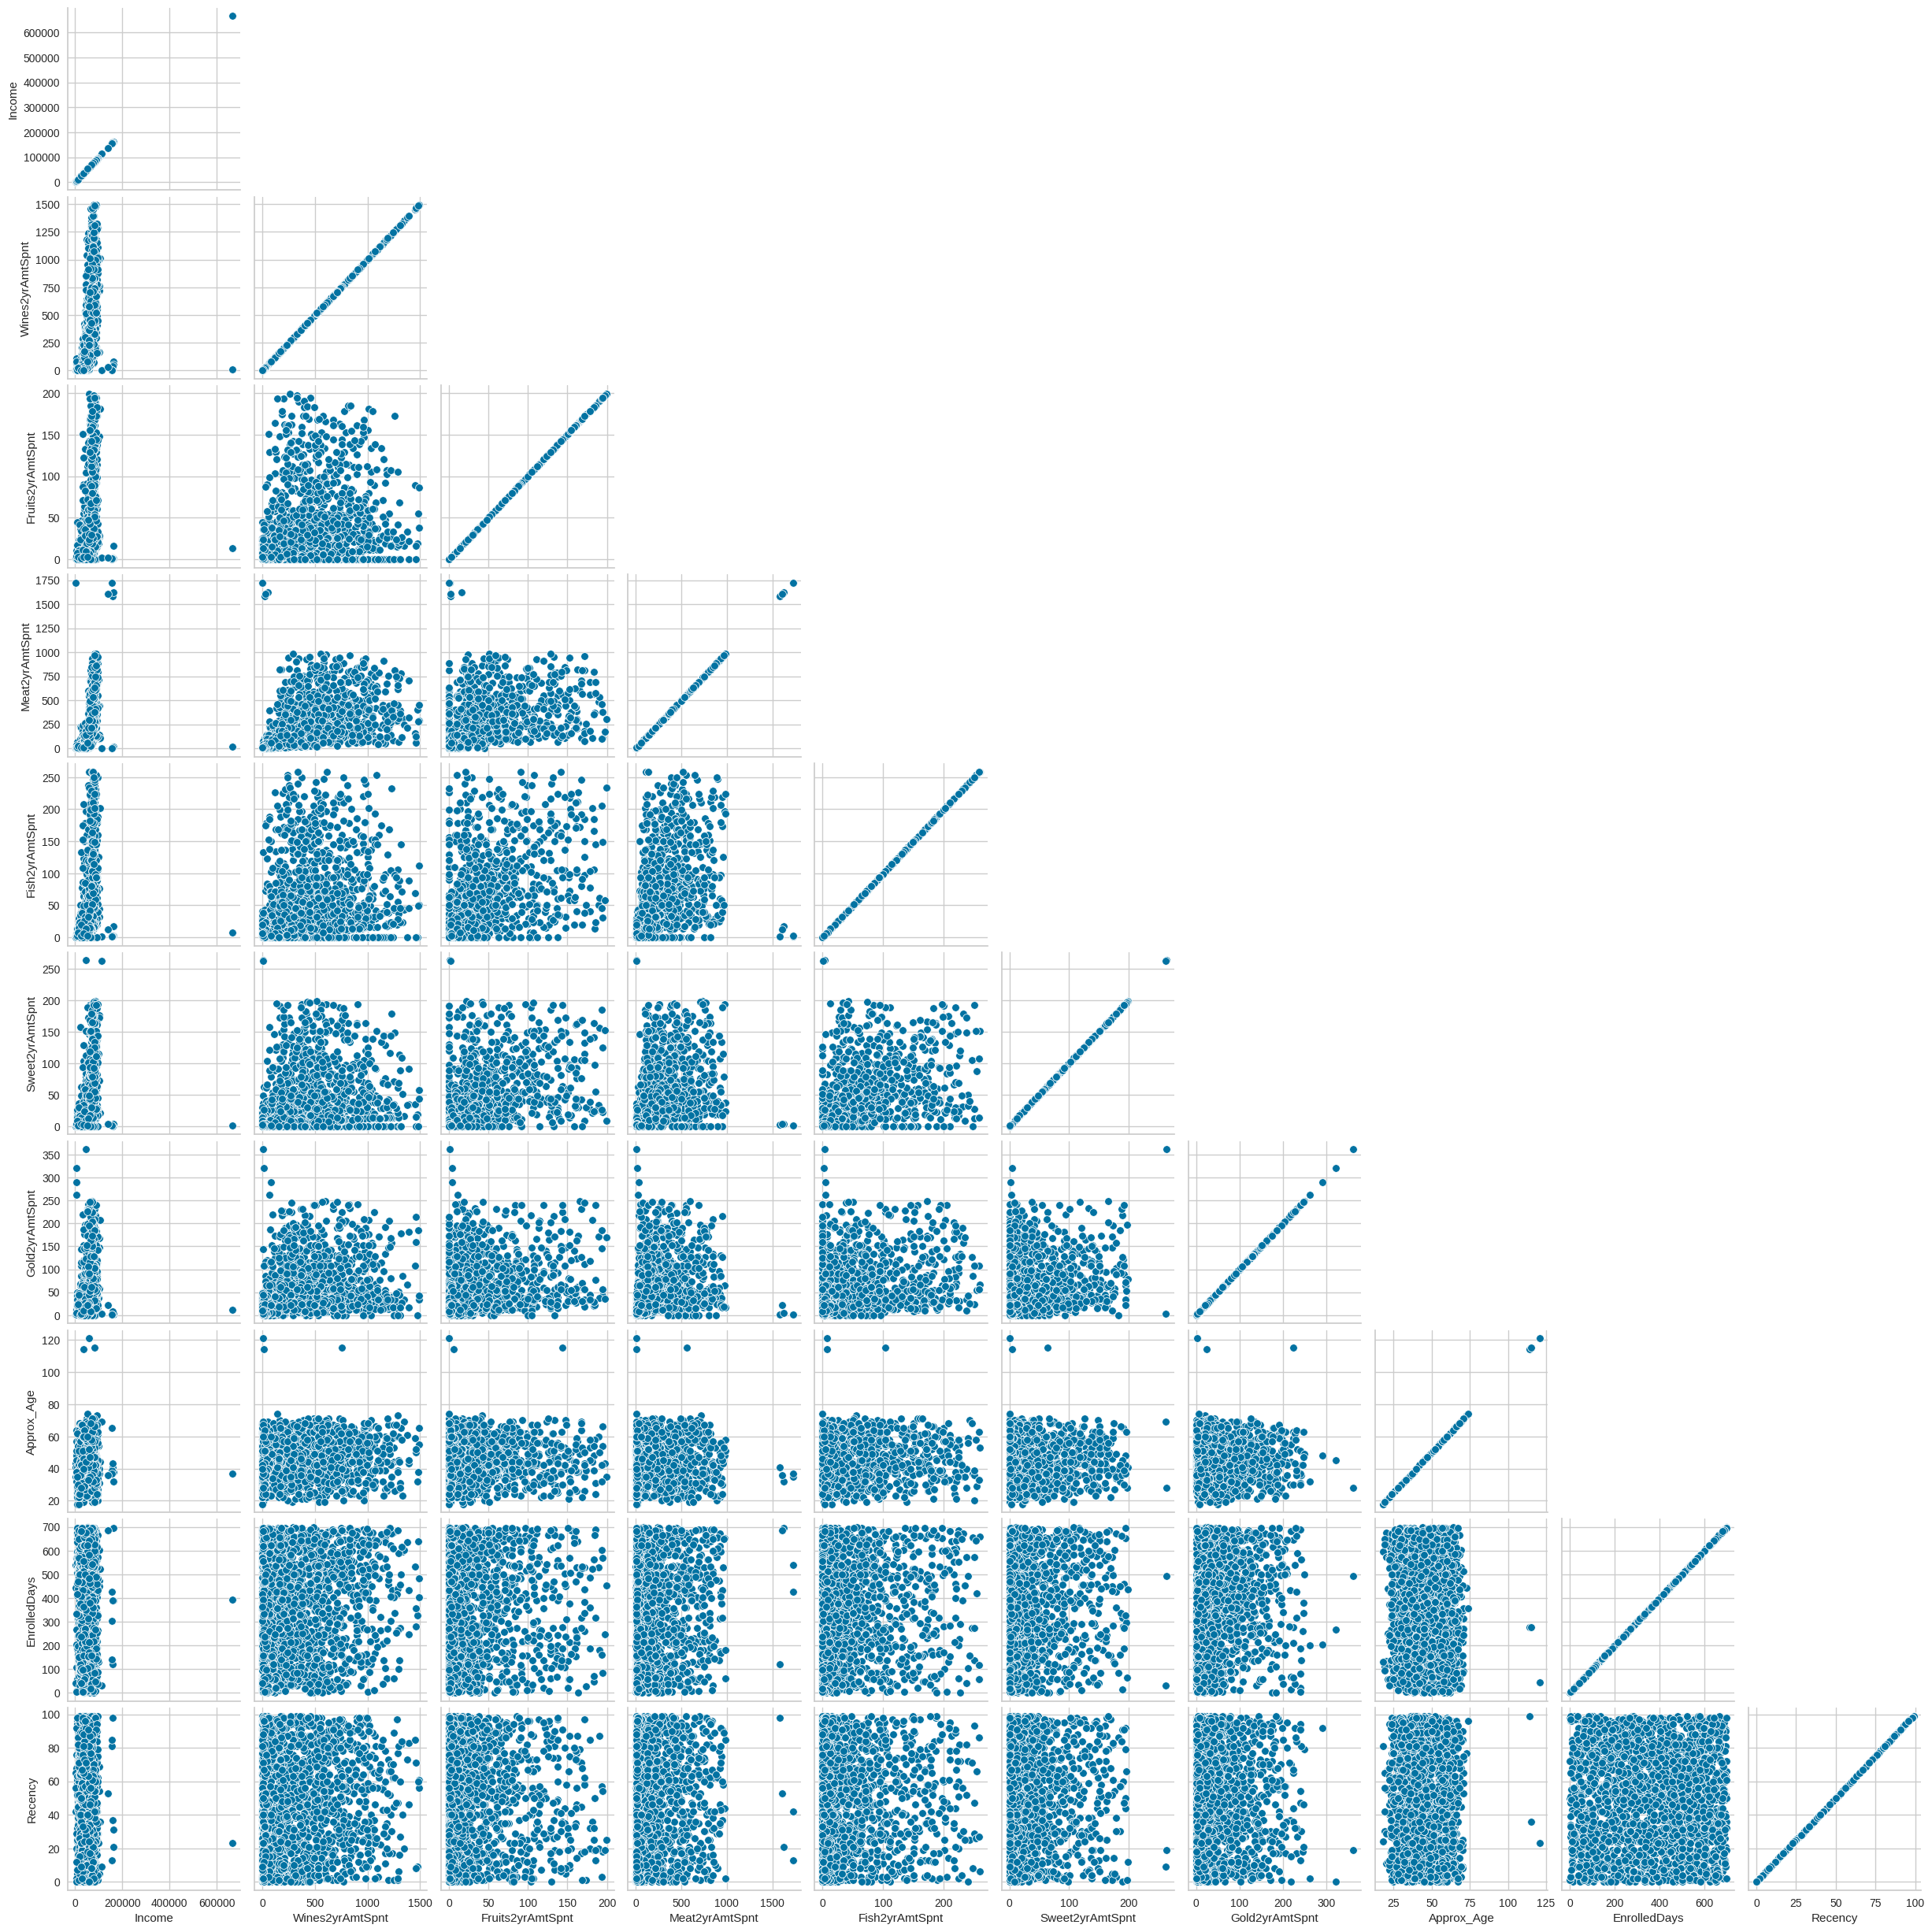

In [198]:
sns.pairplot(data=mcclean[num_cont_feat],diag_kind=None, corner=True)


In [199]:
mcclean[num_feat].corr()

Income  Wines2yrAmtSpnt  Fruits2yrAmtSpnt  \
Income               1.000000         0.576419          0.429318   
Wines2yrAmtSpnt      0.576419         1.000000          0.389821   
Fruits2yrAmtSpnt     0.429318         0.389821          1.000000   
Meat2yrAmtSpnt       0.588201         0.563240          0.543301   
Fish2yrAmtSpnt       0.438240         0.401119          0.593741   
Sweet2yrAmtSpnt      0.435954         0.386550          0.567365   
Gold2yrAmtSpnt       0.321449         0.388627          0.390877   
Approx_Age           0.161034         0.158518          0.019046   
EnrolledDays        -0.016496         0.166107          0.067334   
Recency             -0.002003         0.016089         -0.005394   
Children            -0.294284        -0.352014         -0.393919   
NumDealsPurchases   -0.083902         0.011067         -0.131254   
NumWebPurchases      0.378141         0.542508          0.298001   
NumCatalogPurchases  0.586962         0.635884          0.486526   
NumStorePurchases    0.526088         0.642083          0.462014   
NumWebVisitsMonth   -0.555113        -0.320984         -0.416862   

                     Meat2yrAmtSpnt  Fish2yrAmtSpnt  Sweet2yrAmtSpnt  \
Income                     0.588201        0.438240         0.435954   
Wines2yrAmtSpnt            0.563240        0.401119         0.386550   
Fruits2yrAmtSpnt           0.543301        0.593741         0.567365   
Meat2yrAmtSpnt             1.000000        0.569293         0.524608   
Fish2yrAmtSpnt             0.569293        1.000000         0.582042   
Sweet2yrAmtSpnt            0.524608        0.582042         1.000000   
Gold2yrAmtSpnt             0.351199        0.418054         0.370771   
Approx_Age                 0.029947        0.043256         0.019010   
EnrolledDays               0.094172        0.081706         0.081445   
Recency                    0.022410       -0.000179         0.021750   
Children                  -0.502117       -0.424165        -0.383437   
NumDealsPurchases         -0.122258       -0.138836        -0.119190   
NumWebPurchases            0.294838        0.296275         0.349311   
NumCatalogPurchases        0.724919        0.532777         0.490969   
NumStorePurchases          0.479988        0.461323         0.448866   
NumWebVisitsMonth         -0.539437       -0.443749        -0.423342   

                     Gold2yrAmtSpnt  Approx_Age  EnrolledDays   Recency  \
Income                     0.321449    0.161034     -0.016496 -0.002003   
Wines2yrAmtSpnt            0.388627    0.158518      0.166107  0.016089   
Fruits2yrAmtSpnt           0.390877    0.019046      0.067334 -0.005394   
Meat2yrAmtSpnt             0.351199    0.029947      0.094172  0.022410   
Fish2yrAmtSpnt             0.418054    0.043256      0.081706 -0.000179   
Sweet2yrAmtSpnt            0.370771    0.019010      0.081445  0.021750   
Gold2yrAmtSpnt             1.000000    0.064645      0.159737  0.016244   
Approx_Age                 0.064645    1.000000     -0.020761  0.019712   
EnrolledDays               0.159737   -0.020761      1.000000  0.026299   
Recency                    0.016244    0.019712      0.026299  1.000000   
Children                  -0.264001    0.089806     -0.025621  0.018332   
NumDealsPurchases          0.050229    0.060639      0.217849  0.000974   
NumWebPurchases            0.424449    0.145762      0.190825 -0.009251   
NumCatalogPurchases        0.435230    0.123364      0.096337  0.024041   
NumStorePurchases          0.382705    0.128756      0.110509  0.000842   
NumWebVisitsMonth         -0.247751   -0.122145      0.272174 -0.019708   

                     Children  NumDealsPurchases  NumWebPurchases  \
Income              -0.294284          -0.083902         0.378141   
Wines2yrAmtSpnt     -0.352014           0.011067         0.542508   
Fruits2yrAmtSpnt    -0.393919          -0.131254         0.298001   
Meat2yrAmtSpnt      -0.502117          -0.122258         0.294838   
Fish2yrAmtSpnt      

<Axes: >

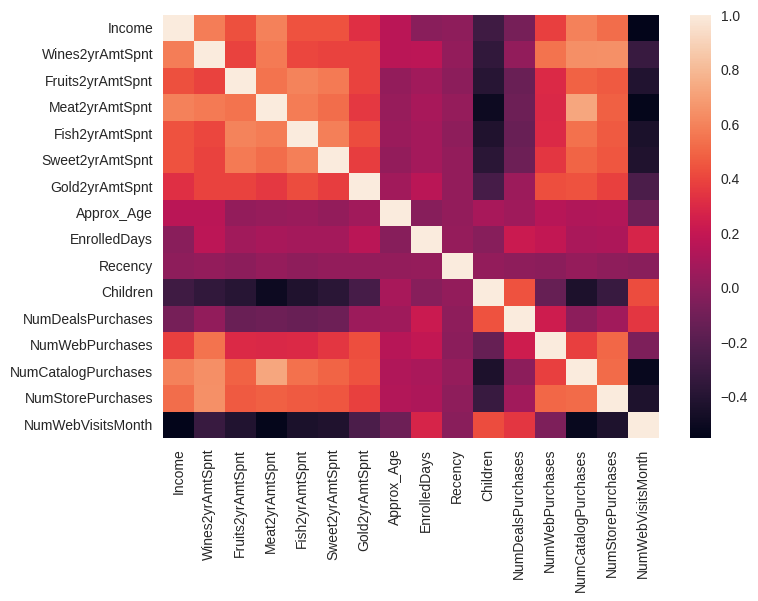

In [200]:
sns.heatmap(mcclean[num_feat].corr())

In [201]:
#Column 'Income' is having a major outleir value '666666'. Updating it to upper bound value

#mcclean['Income'] = np.where(mcclean['Income']==666666.0	,167646.5,mcclean['Income'])

mcclean['Income'].replace({
    666666.0: upper_bound
}, inplace=True)


In [202]:
#Column 'Approx_Age' is having 3 major outleir values 124,125 & 131. These are pretty impossible values as far as a person's age is concerned. Updating it to upper bound value

mcclean['Approx_Age'] = np.where(mcclean['Approx_Age'] > 109, 82, mcclean['Approx_Age'])


In [203]:
mccopy = mcclean.copy()

####**Encoding , Transformation and Scaling of Features**

Encoding the Categorical features\
Transformation and Scaling the numerical features


In [204]:
#Columns 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts' & 'MntGoldProds' are having a lot of major outleir values.
#Due to this the distribution is highly right skewed. As these values are amount of purchases over the period of 2 years they aren't necessarily incorrect values
#and may have significance on Cutomer personality. Hence will log transform them in order to get a normal distribution form

#from sklearn.preprocessing import FunctionTransformer
#ft = FunctionTransformer(np.sqrt) #np.log will avoid 0

#mc[num_cont_feat] =\
 #ft.fit_transform(mc[num_cont_feat])
#mcd = mc.copy()

from sklearn.preprocessing import FunctionTransformer
#ft = FunctionTransformer(np.reciprocal)
ft1 = FunctionTransformer(np.log)
ft2 = FunctionTransformer(np.sqrt)
mcclean['Income'] = ft2.fit_transform(mcclean['Income'].replace({0:1}))
mcclean[[ 'Wines2yrAmtSpnt','Fruits2yrAmtSpnt','Meat2yrAmtSpnt','Fish2yrAmtSpnt','Sweet2yrAmtSpnt','Gold2yrAmtSpnt']] = ft1.fit_transform(mcclean[[ 'Wines2yrAmtSpnt','Fruits2yrAmtSpnt','Meat2yrAmtSpnt','Fish2yrAmtSpnt','Sweet2yrAmtSpnt','Gold2yrAmtSpnt']].replace({0:1}))



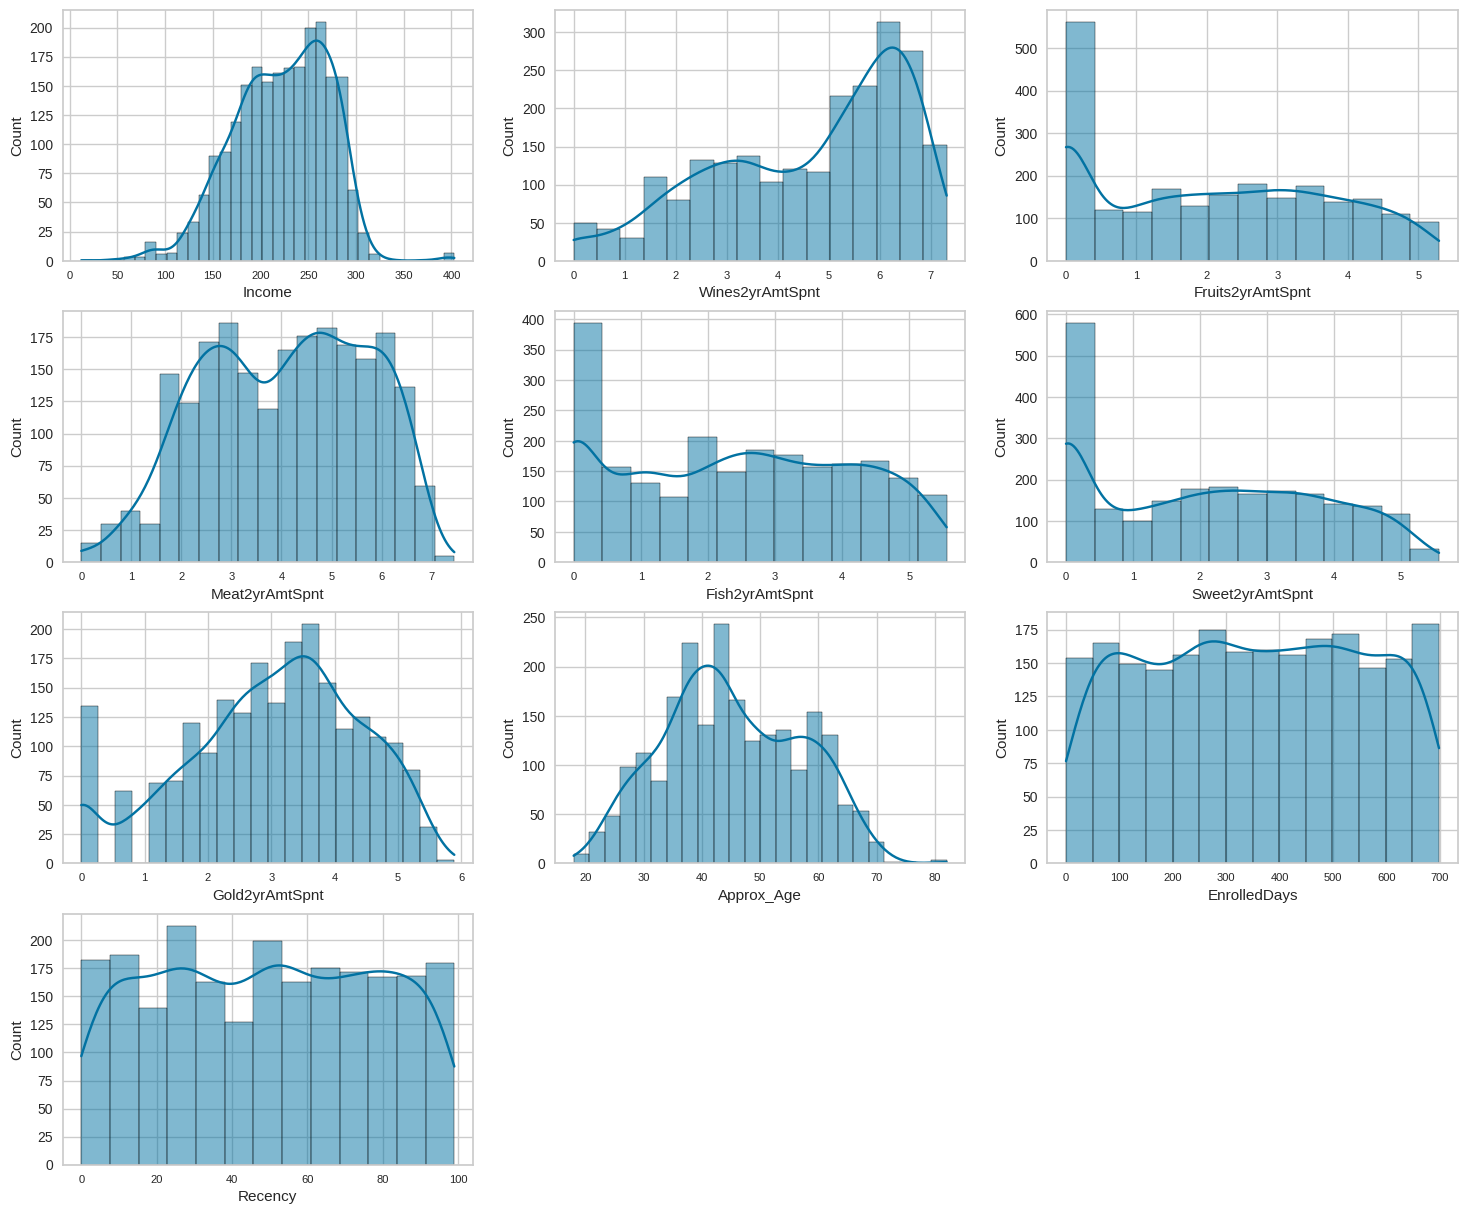

In [205]:
plt.figure(figsize=(18,15))

for i,col in enumerate(num_cont_feat,start=1):
  plt.subplot(4,3,i)
  fence = mcclean[col].max() - mcclean[col].min()
  bins = round(np.sqrt(mcclean[col].count()))
  bin_width = round(fence/bins)
  sns.histplot(data = mcclean, x=mcclean[col], kde=True)
  plt.xticks(fontsize=8)

In [206]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()

mcclean[num_feat] = rs.fit_transform(mcclean[num_feat])

mcclean.head()


Education Marital_Status    Income  Recency  Wines2yrAmtSpnt  \
0  Graduation         Single  0.198091     0.18         0.420947   
1  Graduation         Single -0.152022    -0.22        -0.891984   
2  Graduation        Married  0.556960    -0.46         0.291722   
3  Graduation        Married -0.857090    -0.46        -0.891984   
4         PhD        Married  0.202443     0.90         0.000000   

   Fruits2yrAmtSpnt  Meat2yrAmtSpnt  Fish2yrAmtSpnt  Sweet2yrAmtSpnt  \
0          0.685797        0.784521        0.946391         0.685797   
1         -0.594720       -0.902318       -0.636864        -0.594720   
2          0.518340        0.239139        0.790721         0.276013   
3         -0.198240       -0.452092       -0.064804        -0.280517   
4          0.480982        0.211653        0.477618         0.347889   

   Gold2yrAmtSpnt  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0        0.710718                0.5             1.00                 2.00   
1       -0.758314                0.0            -0.75                -0.25   
2        0.306114               -0.5             1.00                 0.00   
3       -0.858045                0.0            -0.50                -0.50   
4       -0.257096                1.5             0.25                 0.25   

   NumStorePurchases  NumWebVisitsMonth  Complain  Approx_Age  EnrolledDays  \
0               -0.2               0.25         0    0.722222      0.886969   
1               -0.6              -0.25         0    0.888889     -0.696904   
2                1.0              -0.50         0    0.277778     -0.123830   
3               -0.2               0.00         0   -0.777778     -0.622030   
4                0.2              -0.25         0   -0.611111     -0.558675   

   Children  NumOfCampaigns  
0      -1.0               1  
1       1.0               0  
2      -1.0               0  
3       0.0               0  
4       0.0               0

In [207]:
for i in num_feat:
  print(i)
  print(f'Skewness: {mcclean[i].skew()}')
  print(f'Kurtosis: {mcclean[i].kurt()}')

Income
Skewness: -0.3382711189483453
Kurtosis: 0.14536274803275306
Wines2yrAmtSpnt
Skewness: -0.6314009100992133
Kurtosis: -0.6562725583135474
Fruits2yrAmtSpnt
Skewness: 0.1367101744302472
Kurtosis: -1.2489658309981877
Meat2yrAmtSpnt
Skewness: -0.17413667968196078
Kurtosis: -0.9272394747257073
Fish2yrAmtSpnt
Skewness: 0.019315259028759645
Kurtosis: -1.2164598735914915
Sweet2yrAmtSpnt
Skewness: 0.13692699464605912
Kurtosis: -1.2632502013945475
Gold2yrAmtSpnt
Skewness: -0.4320388210856096
Kurtosis: -0.4273341240248061
Approx_Age
Skewness: 0.12163495399797426
Kurtosis: -0.7247513949402231
EnrolledDays
Skewness: -0.01374777644997069
Kurtosis: -1.1928301778687764
Recency
Skewness: -0.0023038433399151775
Kurtosis: -1.2025528866244966
Children
Skewness: 0.41508391537584655
Kurtosis: -0.24812810609545455
NumDealsPurchases
Skewness: 2.424613012080754
Kurtosis: 8.970079003375483
NumWebPurchases
Skewness: 1.3849892969429414
Kurtosis: 5.708989447172636
NumCatalogPurchases
Skewness: 1.8846619544805

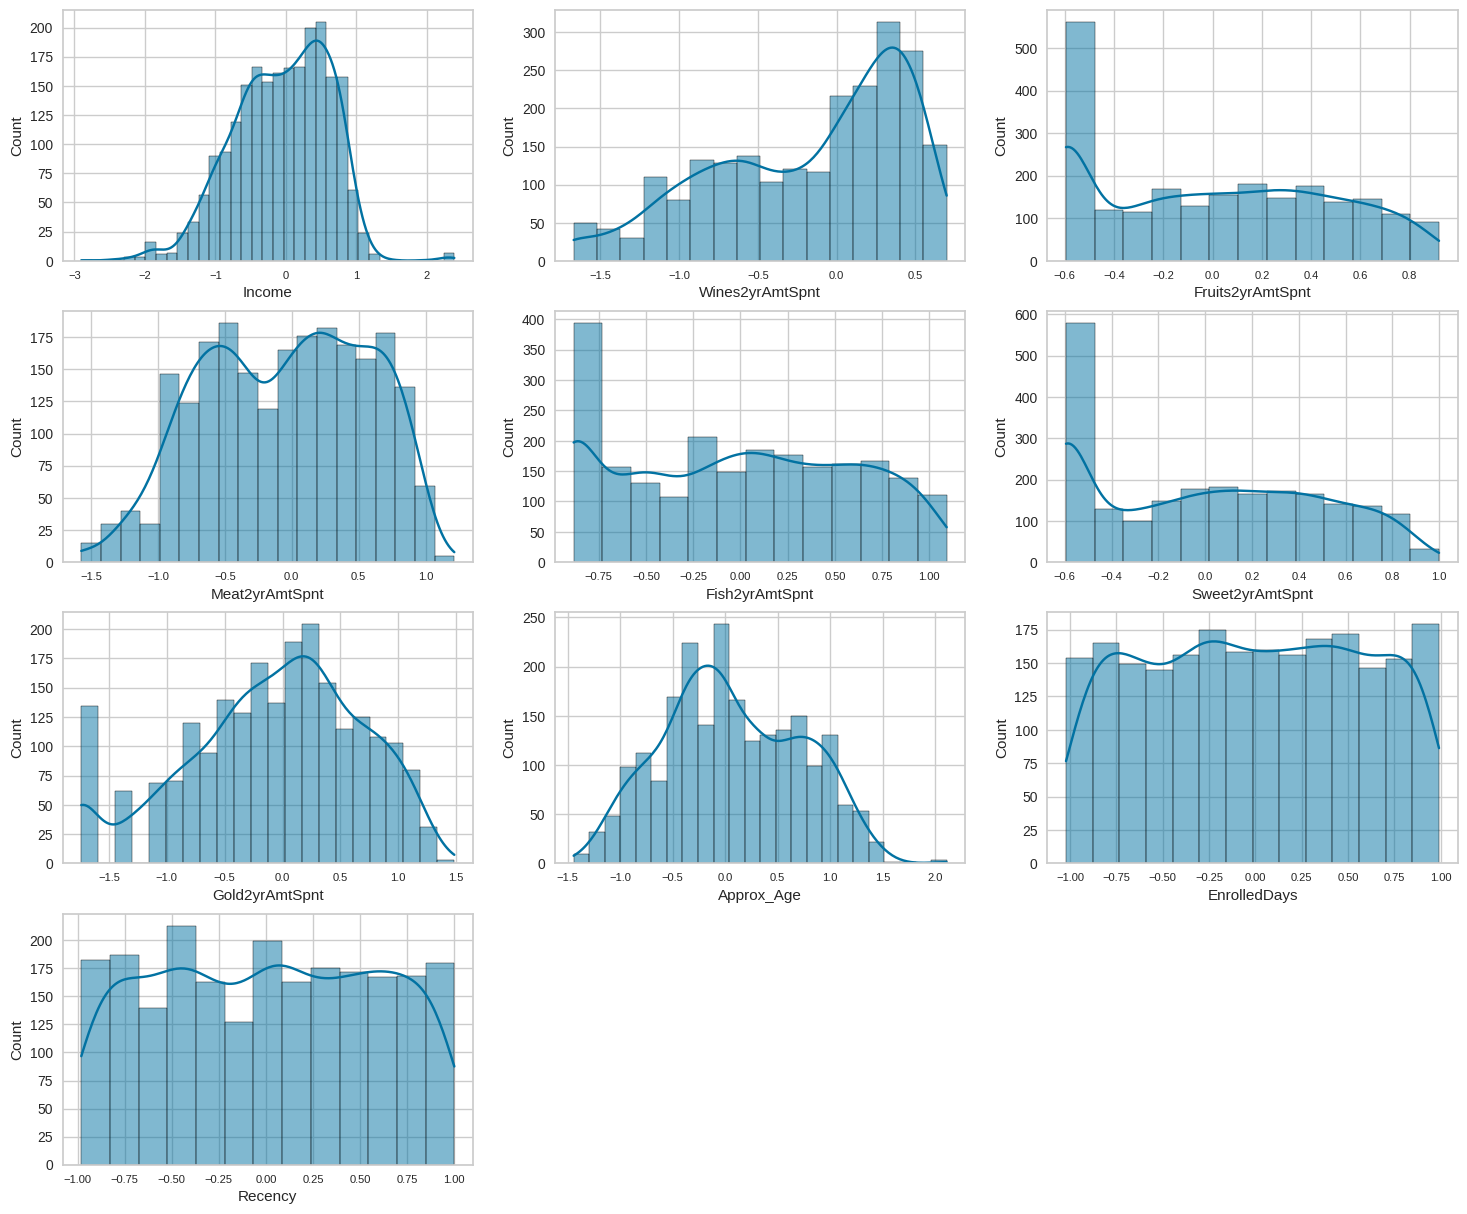

In [208]:
plt.figure(figsize=(18,15))

for i,col in enumerate(num_cont_feat,start=1):
  plt.subplot(4,3,i)
  sns.histplot(data = mcclean, x=mcclean[col], kde=True)
  plt.xticks(fontsize=8)


In [209]:
# Ordinal Encoding for Education Feature

edu_map = {'Graduation': 1, 'PhD': 3, 'Master': 2, 'Basic': 0}

mcclean['Education'] = mcclean['Education'].map(edu_map)


In [210]:
# Dummy Encoding for Marital_Status Feature

mcclean[['Marital_Status_Married','Marital_Status_Single','Marital_Status_Widow']] = pd.get_dummies(mc['Marital_Status'],drop_first=True,prefix='Marital_Status')

mcclean.drop(columns=['Marital_Status'],axis=1,inplace=True)

mcclean.head()

Education    Income  Recency  Wines2yrAmtSpnt  Fruits2yrAmtSpnt  \
0          1  0.198091     0.18         0.420947          0.685797   
1          1 -0.152022    -0.22        -0.891984         -0.594720   
2          1  0.556960    -0.46         0.291722          0.518340   
3          1 -0.857090    -0.46        -0.891984         -0.198240   
4          3  0.202443     0.90         0.000000          0.480982   

   Meat2yrAmtSpnt  Fish2yrAmtSpnt  Sweet2yrAmtSpnt  Gold2yrAmtSpnt  \
0        0.784521        0.946391         0.685797        0.710718   
1       -0.902318       -0.636864        -0.594720       -0.758314   
2        0.239139        0.790721         0.276013        0.306114   
3       -0.452092       -0.064804        -0.280517       -0.858045   
4        0.211653        0.477618         0.347889       -0.257096   

   NumDealsPurchases  ...  NumStorePurchases  NumWebVisitsMonth  Complain  \
0                0.5  ...               -0.2               0.25         0   
1                0.0  ...               -0.6              -0.25         0   
2               -0.5  ...                1.0              -0.50         0   
3                0.0  ...               -0.2               0.00         0   
4                1.5  ...                0.2              -0.25         0   

   Approx_Age  EnrolledDays  Children  NumOfCampaigns  Marital_Status_Married  \
0    0.722222      0.886969      -1.0               1                       0   
1    0.888889     -0.696904       1.0               0                       0   
2    0.277778     -0.123830      -1.0               0                       1   
3   -0.777778     -0.622030       0.0               0                       1   
4   -0.611111     -0.558675       0.0               0                       1   

   Marital_Status_Single  Marital_Status_Widow  
0                      1                     0  
1                      1                     0  
2                      0                     0  
3                      0                     0  
4                      0                     0  

[5 rows x 22 columns]

###**Multivariate Analysis**

We will perform Multivariate Analysis with help of PCA(Principal Component Analysis).

In [211]:
from sklearn.decomposition import PCA

pca = PCA(0.9) # We want 90% of toal explained variance in PCs
pca.fit(mcclean)

print(f'n_components_ : {pca.n_components_}')
print(f'explained_variance_ratio_: {pca.explained_variance_ratio_}')
print(f'explained_variance_ratio_sum: {pca.explained_variance_ratio_.sum()}')

n_components_ : 12
explained_variance_ratio_: [0.32357006 0.14151575 0.09440303 0.07906953 0.0505186  0.04276083
 0.03823873 0.03718388 0.03424922 0.02820001 0.02683992 0.02179263]
explained_variance_ratio_sum: 0.9183421835068787


In [212]:
x_pca = pd.DataFrame(pca.transform(mcclean), columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12'])
x_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -2.442002  0.472861  0.916573  0.628766 -0.227777 -0.578546  0.948470   
1     2.056324 -0.297862 -0.033679 -0.214074  1.453823  0.074473  0.842999   
2    -1.588705 -0.538844  0.758551 -0.763917  0.006716 -0.623287 -0.793936   
3     1.678977 -0.627311  0.724330  0.021469 -0.100667  0.677861 -0.721412   
4    -0.385714  1.124526 -0.709355 -0.760607 -0.868394  1.109194  0.121633   
...        ...       ...       ...       ...       ...       ...       ...   
2231 -1.388788  0.430783  1.048000 -0.420962  0.040850 -0.853437 -0.407878   
2232  0.812664  3.018033 -2.236766  0.182173  1.440490  0.138628 -0.053768   
2233 -1.294773 -1.000797  0.591143  0.185185 -0.136241  0.484016  0.588290   
2234 -1.606190  0.133136 -0.323431 -1.075638  0.460237 -0.060388 -0.761025   
2235  0.774079  0.952309 -1.585610  0.481837  0.146122 -0.749449 -0.204258   

           PC8       PC9      PC10      PC11      PC12  
0    -0.048830  1.192307  0.196781  0.446867  1.155040  
1     0.797936  0.264435 -0.042660 -0.170216  0.313846  
2     0.523523 -0.338402  0.234872  0.545812 -0.320016  
3     0.222370 -0.224629 -0.005591  0.319063 -0.150790  
4    -0.775508 -0.483257 -0.483981  0.418786 -0.244320  
...        ...       ...       ...       ...       ...  
2231  0.170525 -0.648837 -0.583762 -0.165750  0.640283  
2232  0.027032 -0.643921 -0.375020  0.499263  0.241875  
2233 -0.312695 -0.615253  0.357937  0.501288 -1.105327  
2234  0.680822  0.088300 -0.332861 -0.128305 -0.036779  
2235 -0.297071  0.305208 -0.035625 -0.937672 -0.095143  

[2236 rows x 12 columns]

<Axes: xlabel='PC1', ylabel='PC2'>

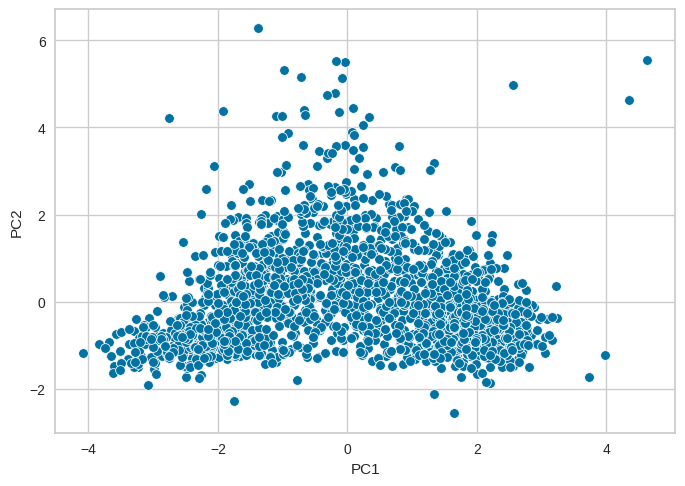

In [213]:
sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1])

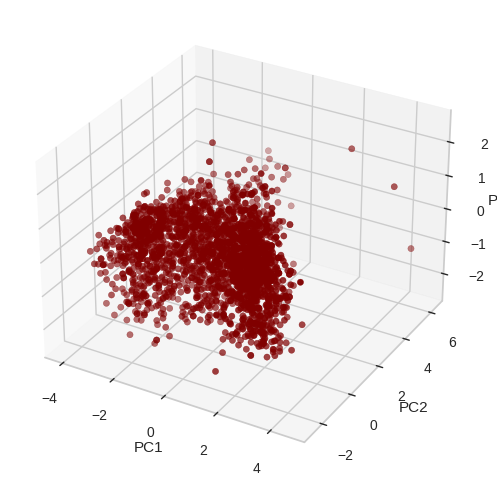

In [214]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    xs=x_pca.iloc[:, 0],
    ys=x_pca.iloc[:, 1],
    zs=x_pca.iloc[:, 2],
    c="maroon",
    marker="o",
)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

###**Applying Clustering Algorithms**

1. Kmeans Clustering
2. Agglomerative Hierarchical Clustering
3. DBSCAN Clustering

###**KMeans Clustering**

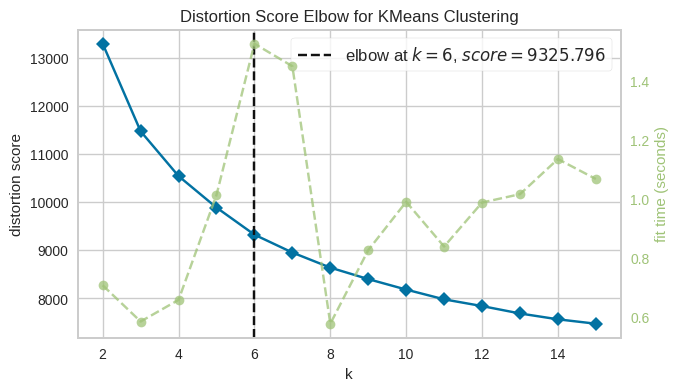

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [215]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig, ax = plt.subplots(figsize=(7,4))
elbow = KElbowVisualizer(KMeans(n_init=10), k=15, ax=ax)
elbow.fit(x_pca)
elbow.show()


In [216]:
#sse = []

#for k in range(1,13):
  #km = KMeans(n_clusters=k, random_state=2)
  #km.fit(x_pca)
  #sse.append(km.inertia_)

#sns.set_style("whitegrid")
#g=sns.lineplot(x=range(1,13), y=sse)
#g.set(xlabel ="Number of cluster (k)", ylabel = "Sum Squared Error",title ='Elbow Method')
#plt.show()

In [217]:

kmeans = KMeans(n_clusters = elbow.elbow_value_, n_init=10)
kmeans.fit(x_pca)

kmeans.cluster_centers_


array([[ 1.86116846e+00, -2.20301842e-01, -8.45604027e-01,
        -1.76952076e-01,  1.89779994e-01,  4.37847165e-02,
         6.90859456e-02,  1.31466973e-02, -6.06593052e-02,
         4.12351857e-02, -1.51784365e-01,  3.77958357e-02],
       [-6.85634343e-01,  5.22139564e-01, -8.87624675e-02,
        -3.33527634e-01, -4.27968539e-02, -3.50125277e-01,
        -5.36361454e-02,  1.14637525e-01, -1.95351858e-01,
         6.53046558e-02,  6.37410222e-02, -1.33363405e-02],
       [-1.87598842e+00, -6.82542883e-01,  2.16533680e-01,
        -6.32911348e-01, -5.04713734e-02,  1.47678356e-01,
         2.91975668e-02, -1.49991911e-02,  1.31024382e-01,
         5.53077674e-03, -5.36671077e-02,  5.34013595e-02],
       [ 1.57235526e+00, -5.09227793e-01,  6.74869369e-01,
         2.79396985e-01, -1.69090416e-01, -1.16064170e-02,
        -4.49151326e-02, -4.76991175e-02,  1.01448802e-01,
        -7.47192307e-02,  5.59888783e-02, -1.97902981e-02],
       [-2.48689070e+00, -7.79365735e-01, -6.0582785

In [218]:
clusters = kmeans.predict(x_pca)
clusters

array([2, 0, 2, ..., 2, 2, 0], dtype=int32)

<Axes: xlabel='PC1', ylabel='PC2'>

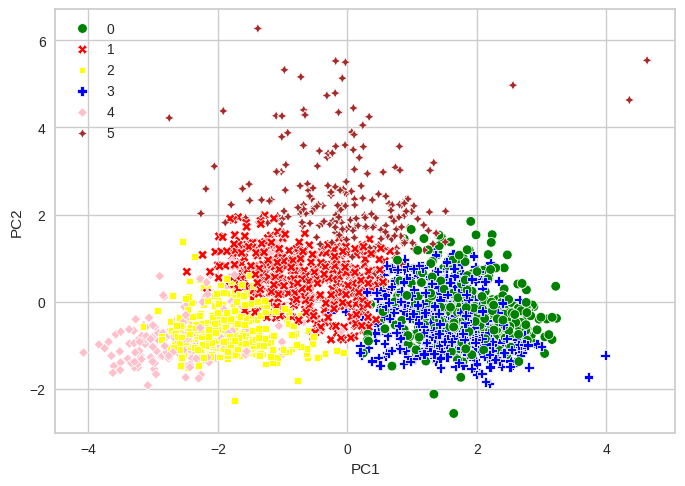

In [219]:
colors = ['green', 'red', 'yellow', 'blue','pink','brown']

sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=clusters,style=clusters,palette=colors)

<ipython-input-220-afca97f2937e>:8: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=kmean_clusters,style=kmean_clusters,palette=colors)
<ipython-input-220-afca97f2937e>:8: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=kmean_clusters,style=kmean_clusters,palette=colors)
<ipython-input-220-afca97f2937e>:8: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=kmean_clusters,style=kmean_clusters,palette=colors)
<ipython-input-220-afca97f2937e>:8: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=kmean_clusters,style=kmean_clusters,palette=colors)
<ipython-input-220-afca97f2937e>:8: 

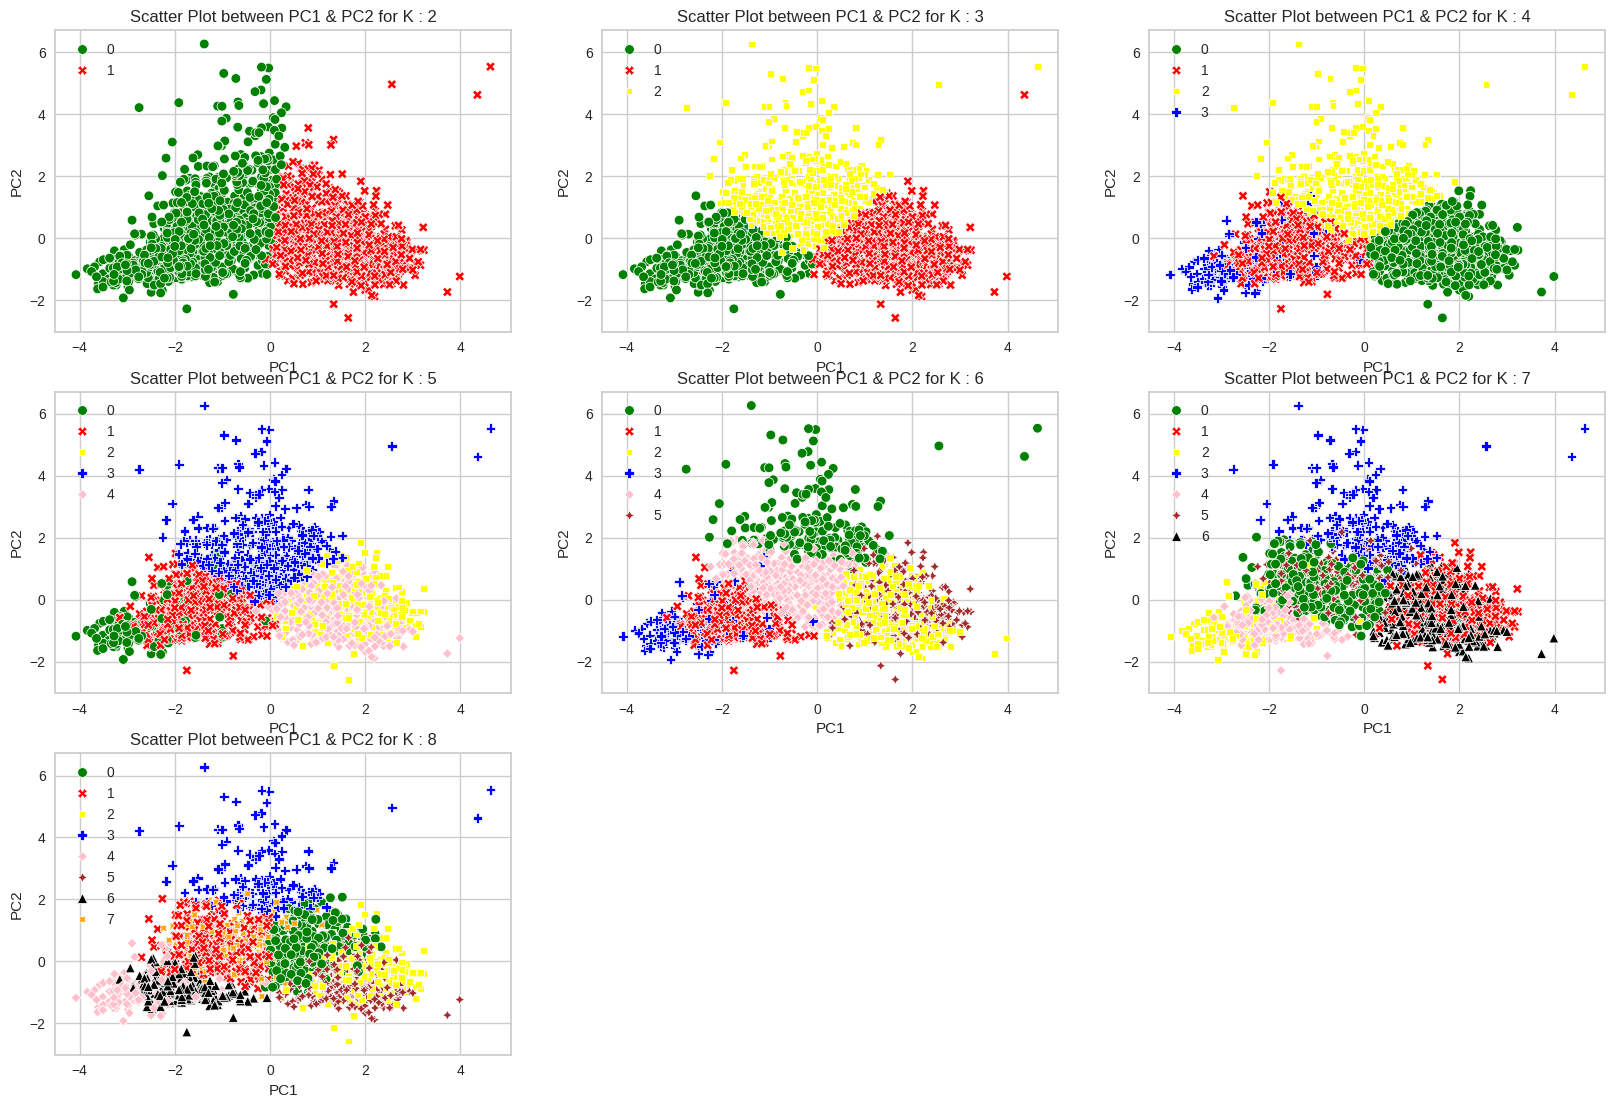

In [220]:
plt.figure(figsize=(20,18))
colors = ['green', 'red', 'yellow', 'blue','pink','brown','black','orange']

for k in range(2,9):
  kmeanss = KMeans(n_clusters=k,n_init=10)
  kmean_clusters = kmeanss.fit_predict(x_pca)
  plt.subplot(4,3,k-1)
  sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=kmean_clusters,style=kmean_clusters,palette=colors)
  plt.title(f'Scatter Plot between PC1 & PC2 for K : {k}')

In [221]:
# taking k = 4 , fit_predict KMeans again

kmeansn = KMeans(n_clusters = 4, n_init=10)
kmeans_clusters = kmeansn.fit_predict(x_pca)
kmeans_clusters



array([0, 2, 0, ..., 0, 0, 1], dtype=int32)

In [222]:
from sklearn.metrics import silhouette_score

silhouette_coff = []

for k in range(2,15):
  kmean = KMeans(n_clusters=k, n_init=10)
  kmean.fit(x_pca)
  score = silhouette_score(x_pca,kmean.labels_)
  silhouette_coff.append(score)

print(silhouette_coff)

[0.25297945615280704, 0.2196757608713821, 0.2235355622849076, 0.15792118727221033, 0.140608863904587, 0.13666792644097686, 0.13073606836995275, 0.12212139163423984, 0.12368538049249128, 0.11972597257477795, 0.11365375377432499, 0.11160166259265919, 0.1118033799744847]


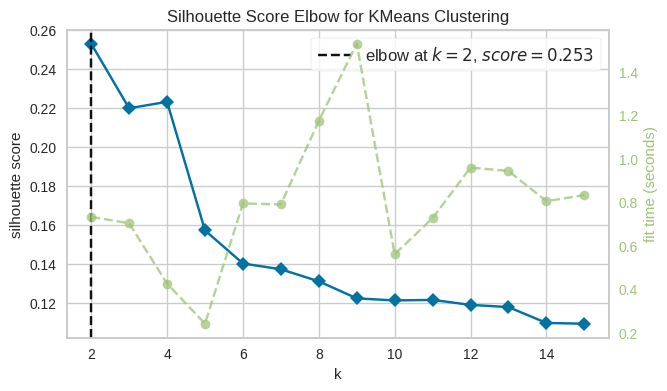

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [223]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

fig, ax = plt.subplots(figsize=(7,4))
elbow_sil = KElbowVisualizer(KMeans(n_init=10), k=15, ax=ax,metric='silhouette')
elbow_sil.fit(x_pca)
elbow_sil.show()


###**Hierarchical Clustering Agglomerative approach**

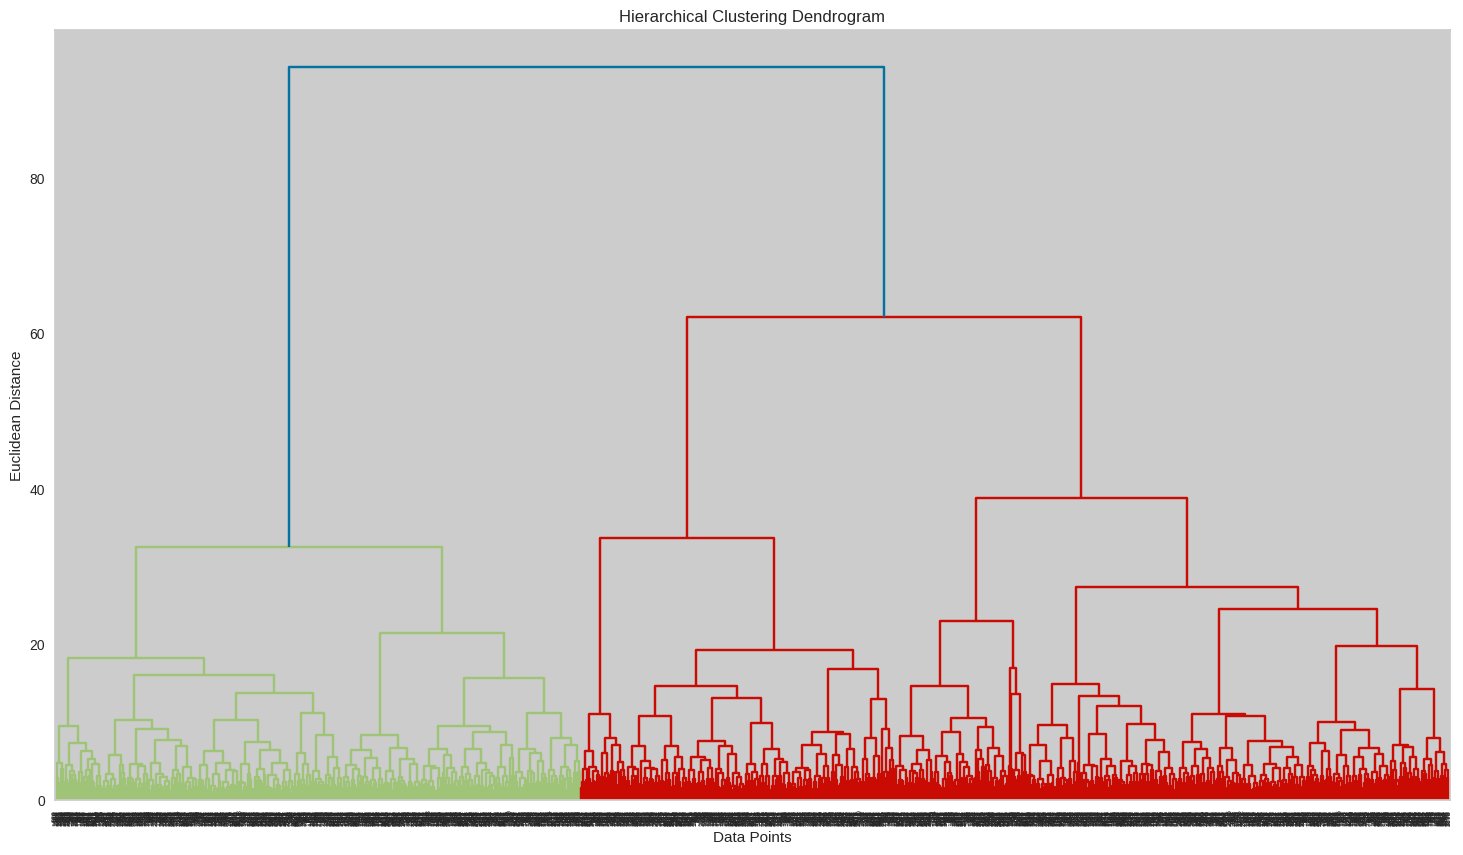

In [224]:
from scipy.cluster.hierarchy import dendrogram,linkage

linkage_matrix = linkage(x_pca, metric='euclidean', method='ward')



plt.figure(figsize=(18,10))
dendromap = dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [225]:
from sklearn.cluster import AgglomerativeClustering

aggclustering = AgglomerativeClustering(n_clusters=elbow_sil.elbow_value_, metric='euclidean', linkage='ward')
agglolabels = aggclustering.fit_predict(x_pca)
agglolabels

array([0, 1, 0, ..., 0, 0, 1])

<ipython-input-226-6413f8ddb9c9>:8: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=agglolabels,style=agglolabels,palette=colors)
<ipython-input-226-6413f8ddb9c9>:8: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=agglolabels,style=agglolabels,palette=colors)
<ipython-input-226-6413f8ddb9c9>:8: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=agglolabels,style=agglolabels,palette=colors)
<ipython-input-226-6413f8ddb9c9>:8: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=agglolabels,style=agglolabels,palette=colors)
<ipython-input-226-6413f8ddb9c9>:8: UserWarning: The palette

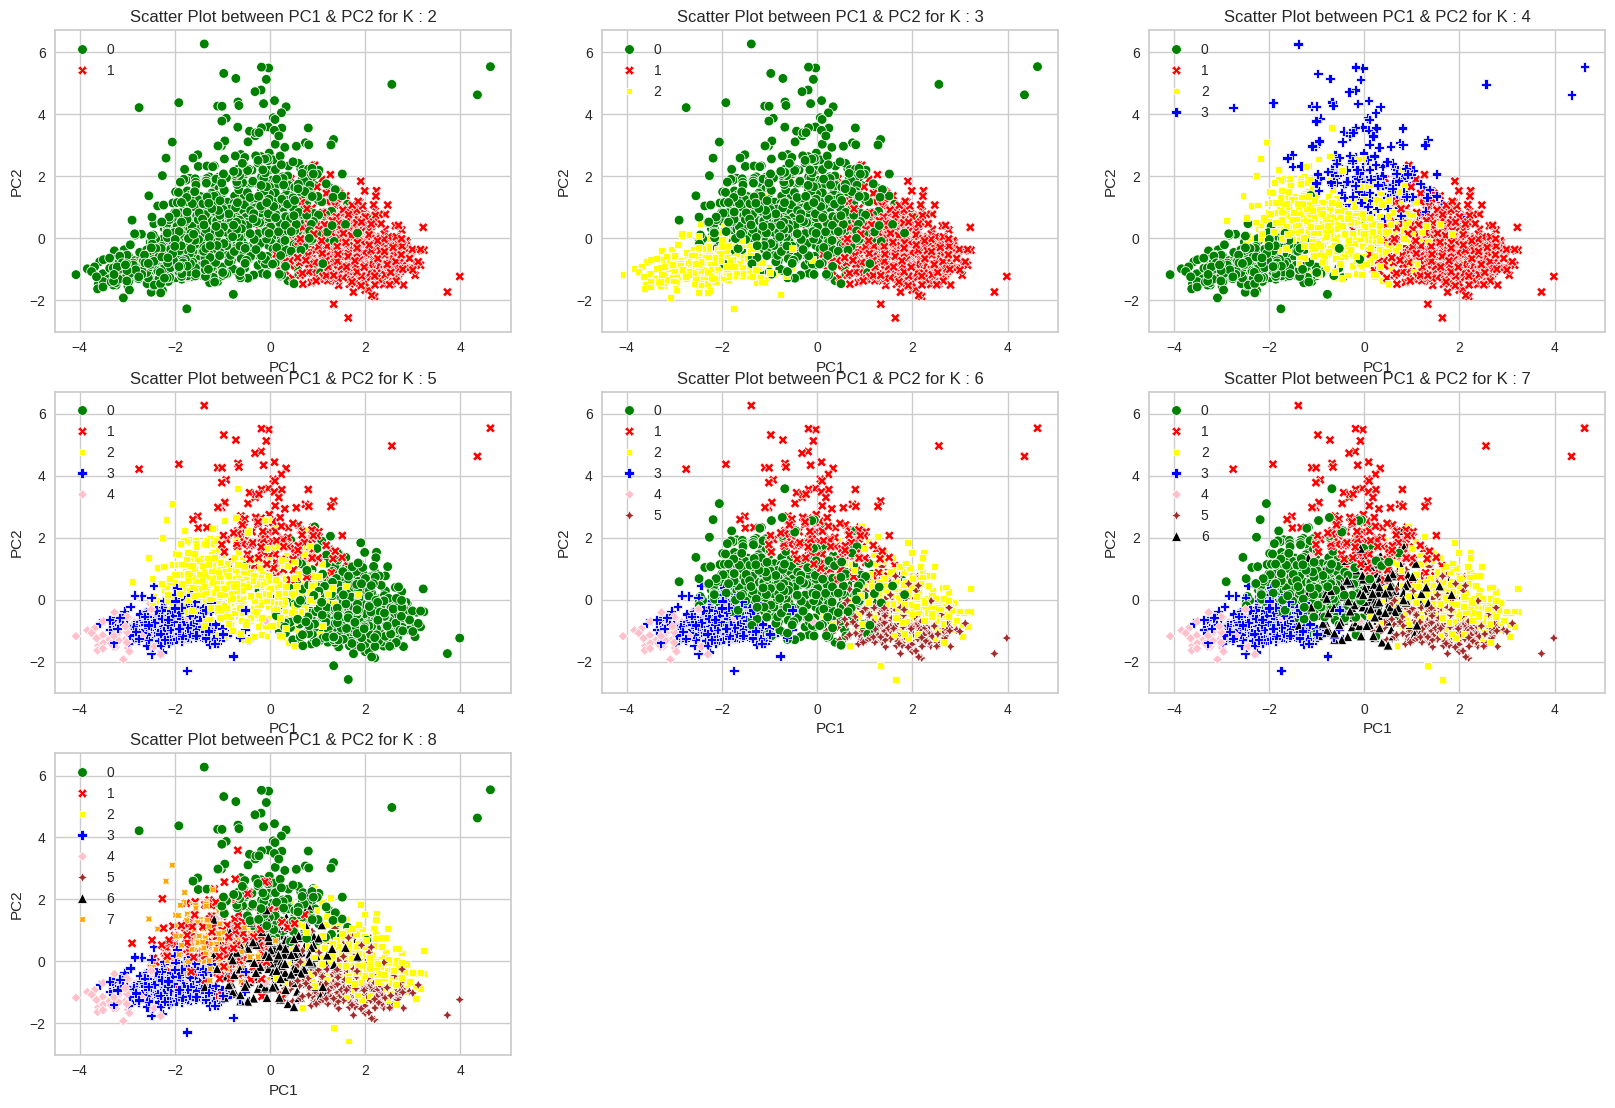

In [226]:
plt.figure(figsize=(20,18))
colors = ['green', 'red', 'yellow', 'blue','pink','brown','black','orange']

for k in range(2,9):
  aggclustering = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
  agglolabels = aggclustering.fit_predict(x_pca)
  plt.subplot(4,3,k-1)
  sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=agglolabels,style=agglolabels,palette=colors)
  plt.title(f'Scatter Plot between PC1 & PC2 for K : {k}')

###**DBSCAN Clustering**

In [227]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors().fit(x_pca)

distances, indices = nn.kneighbors(x_pca)


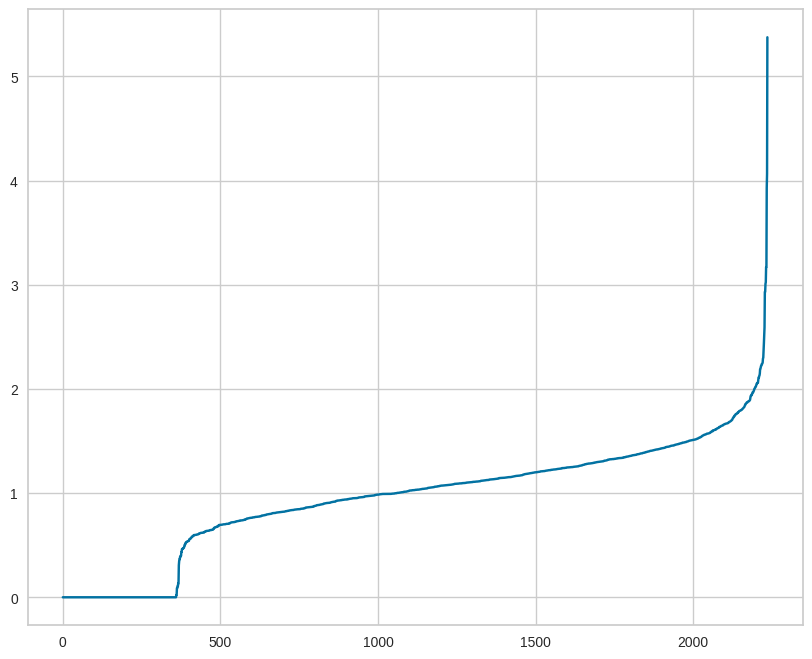

In [228]:
distances = np.sort(distances, axis=0)[:,1]

plt.figure(figsize=(10,8))
plt.plot(distances)

In [229]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5)

dbscan_clusters = dbscan.fit_predict(x_pca)

dbscan_clusters


array([-1, -1, -1, ..., -1, -1, -1])

<ipython-input-230-105303c4219e>:9: UserWarning: The palette list has more values (8) than needed (1), which may not be intended.
  sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=dbscan_clusterss,style=dbscan_clusterss,palette=colors)
<ipython-input-230-105303c4219e>:9: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=dbscan_clusterss,style=dbscan_clusterss,palette=colors)
<ipython-input-230-105303c4219e>:9: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=dbscan_clusterss,style=dbscan_clusterss,palette=colors)
<ipython-input-230-105303c4219e>:9: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=dbscan_clusterss,style=dbscan_clusterss,palette=colors)
<ipython-input-230-1

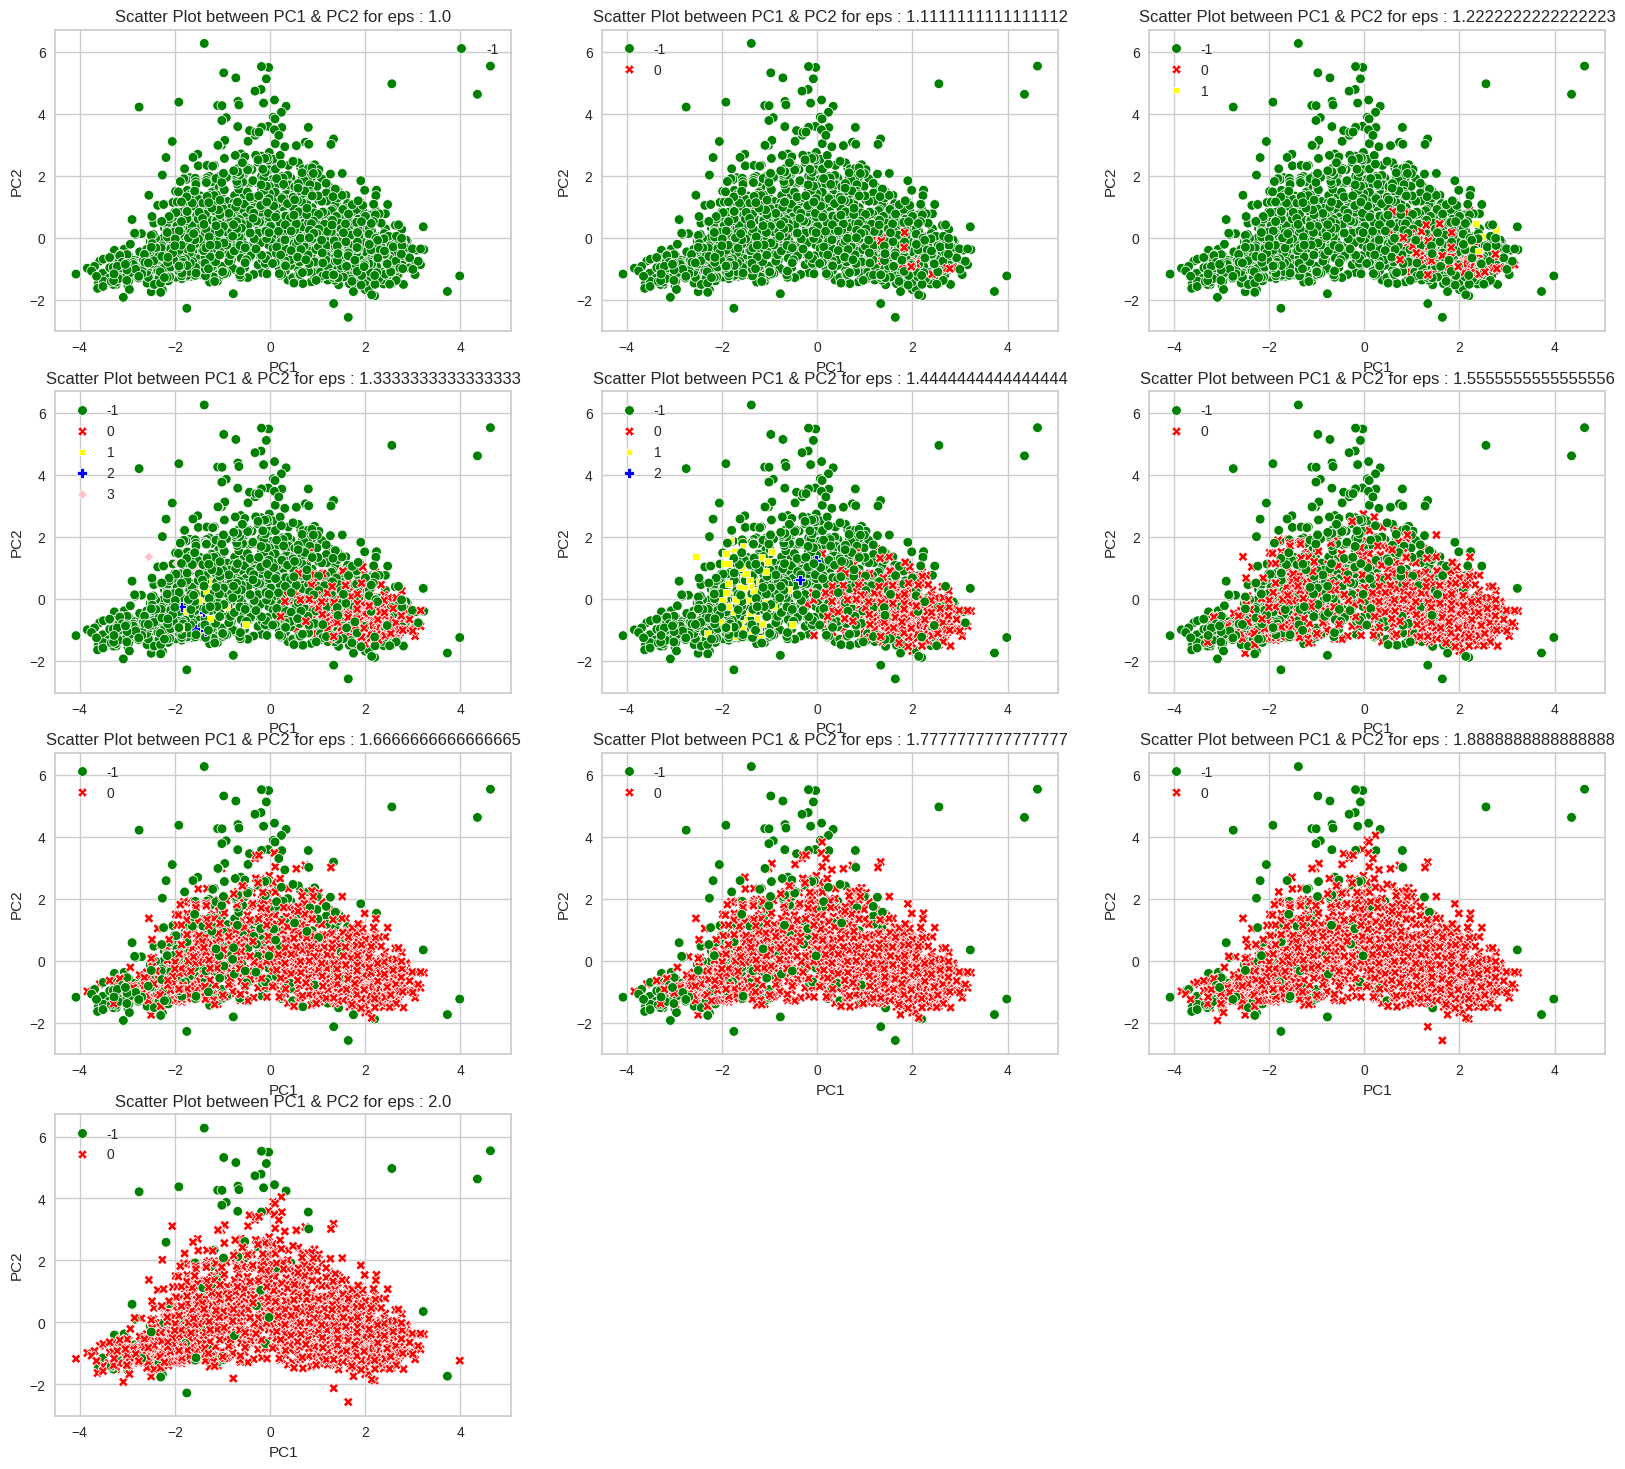

In [230]:
plt.figure(figsize=(20,18))
colors = ['green', 'red', 'yellow', 'blue','pink','brown','black','orange']

i=1
for eps in np.linspace(1,2,10):
  dbscan = DBSCAN(eps=eps,min_samples=24)
  dbscan_clusterss = dbscan.fit_predict(x_pca)
  plt.subplot(4,3,i)
  sns.scatterplot(x=x_pca.iloc[:,0], y=x_pca.iloc[:,1],hue=dbscan_clusterss,style=dbscan_clusterss,palette=colors)
  plt.title(f'Scatter Plot between PC1 & PC2 for eps : {eps}')
  i+=1

###**Recommendation for Final Model**

After careful consideration of various Kmeans , Agglomerative Clustering and DBSCAn, I recommend utilizing the KMeans Clustering algorithm as the final model for the analysis. It is suitable for the task of summarizing customer segments based on their similarities, providing a comprehensive understanding of the relationships among different customer profiles. Its adaptability to different levels of granularity in clustering makes it a robust choice for gaining insights into customer behavior patterns and tailoring marketing strategies accordingly.

In [231]:
mccopy.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Wines2yrAmtSpnt',
       'Fruits2yrAmtSpnt', 'Meat2yrAmtSpnt', 'Fish2yrAmtSpnt',
       'Sweet2yrAmtSpnt', 'Gold2yrAmtSpnt', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Approx_Age', 'EnrolledDays',
       'Children', 'NumOfCampaigns'],
      dtype='object')

In [232]:
kmeans_data = mccopy.copy()
kmeans_data['Clusters'] = kmeans_clusters

kmeans_data.head(2)

Education Marital_Status   Income  Recency  Wines2yrAmtSpnt  \
0  Graduation         Single  58138.0       58              635   
1  Graduation         Single  46344.0       38               11   

   Fruits2yrAmtSpnt  Meat2yrAmtSpnt  Fish2yrAmtSpnt  Sweet2yrAmtSpnt  \
0                88             546             172               88   
1                 1               6               2                1   

   Gold2yrAmtSpnt  ...  NumWebPurchases  NumCatalogPurchases  \
0              88  ...                8                   10   
1               6  ...                1                    1   

   NumStorePurchases  NumWebVisitsMonth  Complain  Approx_Age  EnrolledDays  \
0                  4                  7         0          57           663   
1                  2                  5         0          60           113   

   Children  NumOfCampaigns  Clusters  
0         0               1         0  
1         2               0         2  

[2 rows x 21 columns]

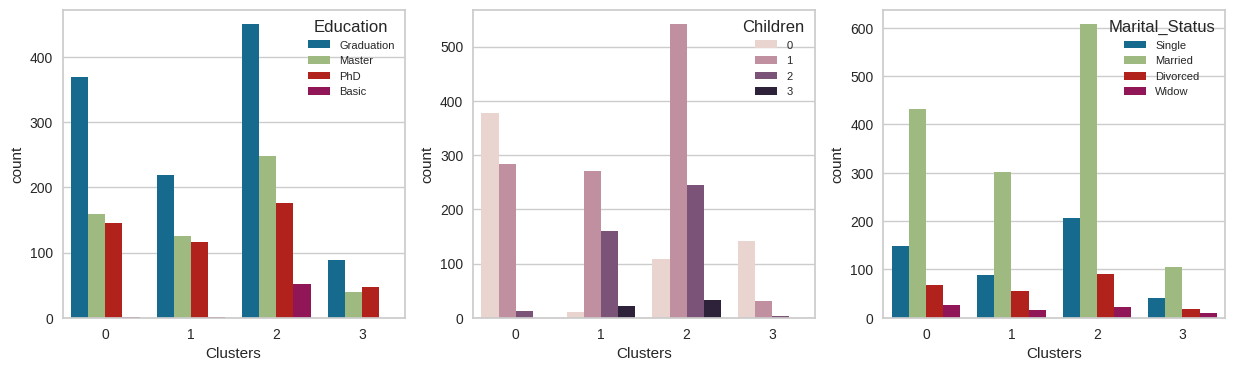

In [233]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

sns.countplot(data=kmeans_data, x=kmeans_data['Clusters'], hue=kmeans_data['Education'], ax=ax1)
sns.countplot(data=kmeans_data, x=kmeans_data['Clusters'], hue=kmeans_data['Children'], ax=ax2)
sns.countplot(data=kmeans_data, x=kmeans_data['Clusters'], hue=kmeans_data['Marital_Status'], ax=ax3)
ax1.legend(fontsize=8,title='Education')
ax2.legend(fontsize=8,title='Children')
ax3.legend(fontsize=8,title='Marital_Status')

###**Cluster 3**

1.   Least populated group
2.   At max 2 children
3.   Majority have only 1 child
4.   Mix of married and alone
4.   More income and More spending
5.   Accepted 50% of Campaigns(the highest number)
6.   No complaints in last 2 years
7.   Purchase from store, web and catalouge
8.   Least no of deal purchases
9.   Highest average Income group of all groups
10.  Average age around 44 years
11.  Mostly Spends on Wines and meat. Least on gold
12.  Loyal Customers


In [234]:
kmeans_data['Total_amount_spent'] = kmeans_data[['Wines2yrAmtSpnt','Fruits2yrAmtSpnt','Meat2yrAmtSpnt','Fish2yrAmtSpnt','Sweet2yrAmtSpnt','Gold2yrAmtSpnt']].sum(axis=1)
kmeans_data['Total_amount_spent']

0       1617
1         27
2        776
3         53
4        422
        ... 
2231    1341
2232     444
2233    1241
2234     843
2235     172
Name: Total_amount_spent, Length: 2236, dtype: int64

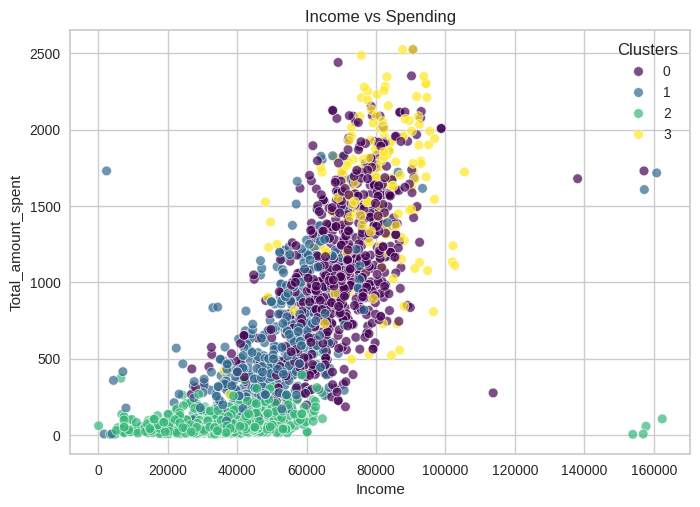

In [235]:
sns.scatterplot(
    data=kmeans_data,
    x=kmeans_data['Income'],
    y=kmeans_data['Total_amount_spent'],
    hue=kmeans_data['Clusters'],
    palette="viridis",
    alpha=0.7,
)
plt.title("Income vs Spending")
plt.show()

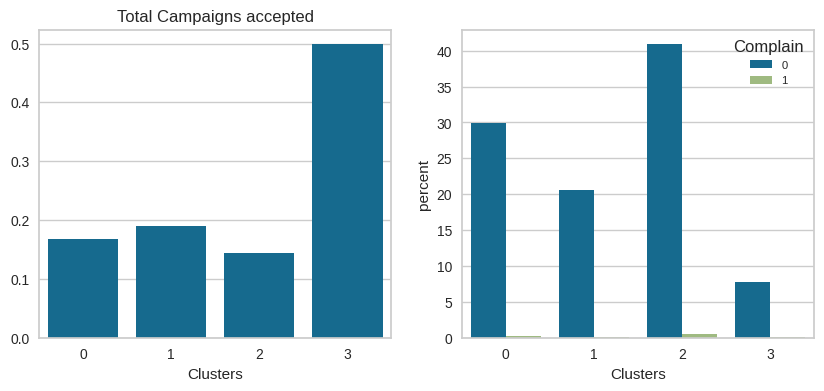

In [245]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

total_campaigns = (kmeans_data.groupby('Clusters')['NumOfCampaigns'].sum()/kmeans_data['NumOfCampaigns'].sum()).rename('percent_camp')
sns.barplot(x=total_campaigns.index, y=total_campaigns.values, ax=ax1)
sns.countplot(data=kmeans_data, x=kmeans_data['Clusters'], hue=kmeans_data['Complain'], stat='percent', ax=ax2)
ax1.set_title('Total Campaigns accepted')
ax2.legend(fontsize=8,title='Complain')



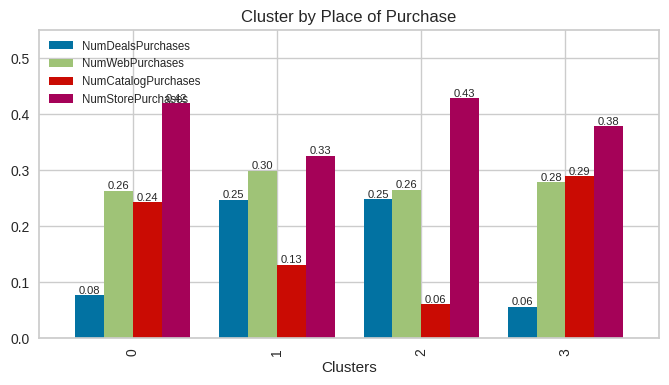

In [237]:
places = (
    "NumDealsPurchases NumWebPurchases NumCatalogPurchases NumStorePurchases".split()
)

by_place_of_purchase = kmeans_data.groupby("Clusters")[places].sum()
by_place_of_purchase = by_place_of_purchase.apply(lambda x: x / np.sum(x), axis=1)

ax = plt.axes()
by_place_of_purchase.plot(kind="bar", figsize=(8, 4), ax=ax, width=0.8, ylim=(0, 0.55))
ax.legend(fontsize=8.3, loc=2)
for i in ax.containers:
    plt.bar_label(i, fmt="%.2f", fontsize=8)
ax.set_title("Cluster by Place of Purchase")
plt.show()

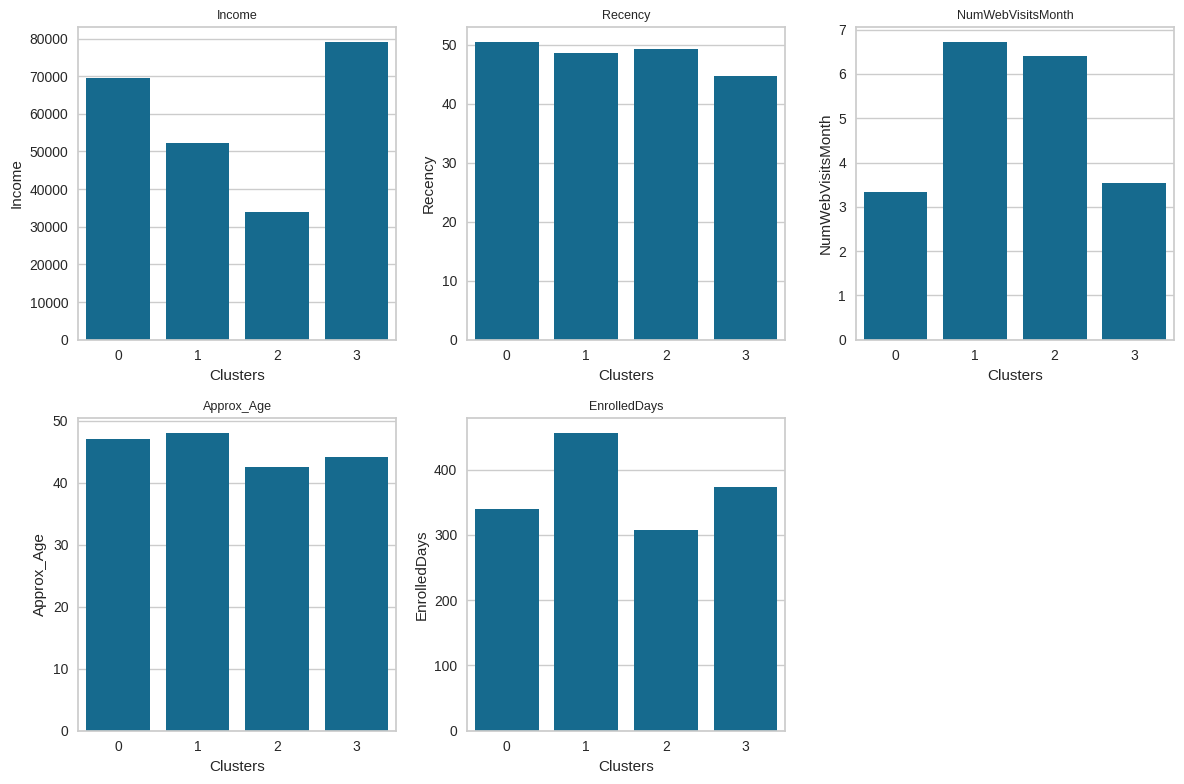

In [238]:
other_num_cols = ['Income', 'Recency','NumWebVisitsMonth', 'Approx_Age', 'EnrolledDays']
plt.figure(figsize=(12, 8))
data = kmeans_data.groupby('Clusters')[other_num_cols].mean().sort_values(by=other_num_cols, ascending=False)
for i, col in enumerate(other_num_cols,start=1):
  plt.subplot(2, 3, i)
  #data.sort_values(by=col, ascending=False, inplace=True)
  #ax.plot(data.index, data[col], marker="o", ls="", ms=10)
  sns.barplot(x=data.index, y=data[col])
  plt.title(f"{col}", size=9)
plt.tight_layout()

In [239]:
kmeans_data.groupby('Clusters')['Total_amount_spent'].sum()

Clusters
0    724957
1    285071
2     72316
3    271411
Name: Total_amount_spent, dtype: int64

In [240]:
product_amount_spent = kmeans_data.groupby('Clusters')[['Wines2yrAmtSpnt','Fruits2yrAmtSpnt','Meat2yrAmtSpnt','Fish2yrAmtSpnt','Sweet2yrAmtSpnt','Gold2yrAmtSpnt']].sum().T/kmeans_data.groupby('Clusters')['Total_amount_spent'].sum()

product_amount_spent

Clusters                 0         1         2         3
Wines2yrAmtSpnt   0.447734  0.617078  0.437317  0.542856
Fruits2yrAmtSpnt  0.051621  0.028081  0.052478  0.035072
Meat2yrAmtSpnt    0.308054  0.198249  0.223478  0.284591
Fish2yrAmtSpnt    0.074581  0.037384  0.071146  0.050727
Sweet2yrAmtSpnt   0.052305  0.028912  0.053515  0.038771
Gold2yrAmtSpnt    0.065705  0.090297  0.162066  0.047983

In [241]:
product_amount_spent.style.background_gradient(cmap="viridis", axis=0)

##**Customer Personality Analysis**

###**Cluster 0**

1.   Half of them are Graduates
2.   Around 60% have no children
3.   Most are Married people
4.   As Income increases so does the spending
5.   Accepted less than 20% of Campaigns
6.   No complaints in last 2 years
7.   Mostly purchase from store
8.   Second Highest average Income group
9.   Average age around 46 years
10.  Spends more on Wine and Meat
11.  Regular Customers


###**Cluster 1**

1.   50% lesser people than Cluster 0 group
2.   Majority have more than 1 child
3.   Most are Married people
4.   As Income increases so does the spending
5.   Accepted around 20% of Campaigns
6.   No complaints in last 2 years
7.   Mostly purchase from store and web. Frequent deal purchases
8.   Third Highest average Income group
9.   Average age around 48 years
10.  Spends the most on Wines and more than any other group
11.  Veteran Customers

###**Cluster 2**

1.   Highest no of Graduates
2.   Only group having people with just Basic Education
3.   Majority have only 1 child
4.   Majority are Married people
4.   Low income and low spending
5.   Accepted less 15% of Campaigns
6.   Few complaints in last 2 years
7.   Mostly purchase from store. Frequent deal purchases
8.   Lowest average Income group
9.   Average age around 42 years
10.  Spends on Wines, meat and some gold
11.  Comparetively New Customers

###**Cluster 3**

1.   Least populated group
2.   At max 2 children
3.   Majority have only 1 child
4.   Mix of married and alone
4.   More income and More spending
5.   Accepted 50% of Campaigns(the highest number)
6.   No complaints in last 2 years
7.   Purchase from store, web and catalouge
8.   Least no of deal purchases
9.   Highest average Income group of all groups
10.  Average age around 44 years
11.  Mostly Spends on Wines and meat. Least on gold
12.  Loyal Customers


##**Final Verdict :**

Cluster 3 is  ideal because it is most balanced, Highest income, loyal group of customers having highest participation in Campaigns and are less interested in deals. Tends to purchase from all the channels and have no compaints for last 2 years